# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', 30)
pd.set_option('mode.chained_assignment', None)

In [3]:
try:
    data = pd.read_csv('m1_s5.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

#data = pd.read_csv('m1_s5.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

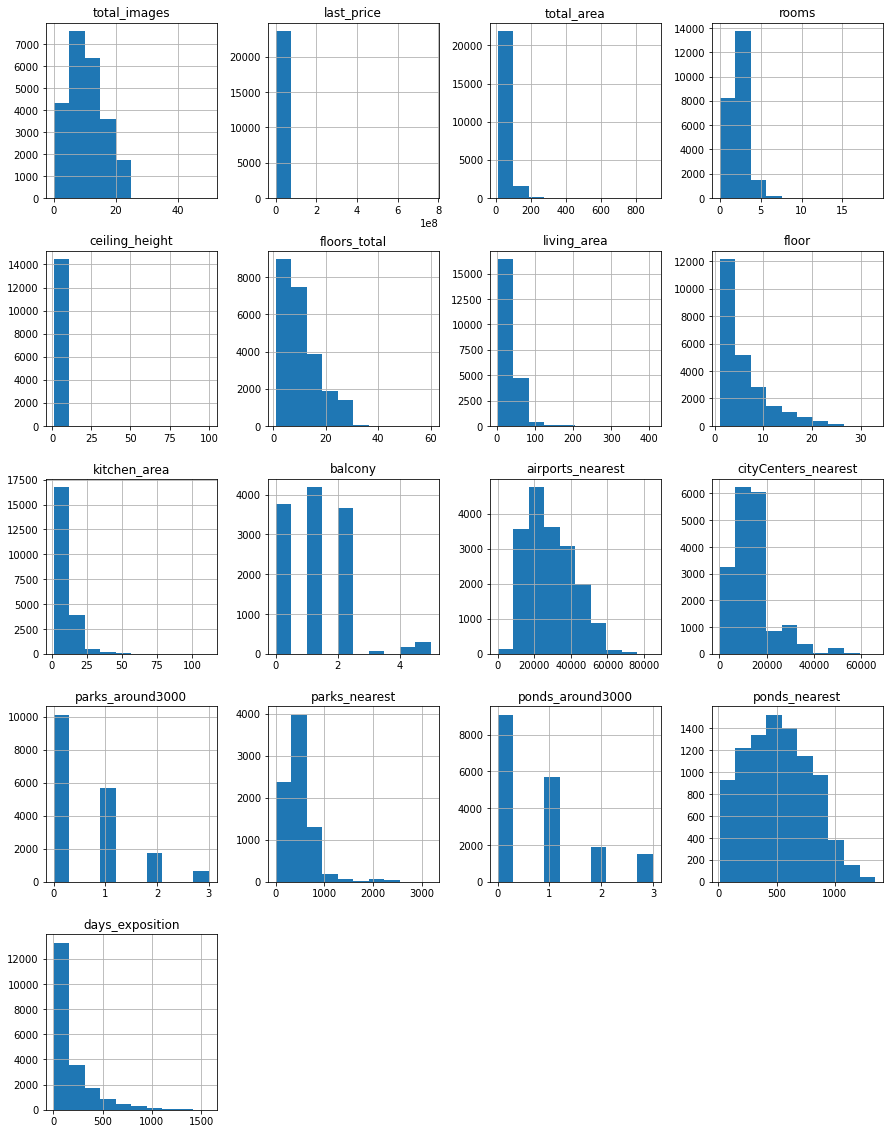

In [5]:
data.hist(figsize=(15, 20))
plt.show()

Проблемы:

Очень много пропущенных значений:
* вероятно, людям лениво заполнять ненужные по их мнению параметры (а-ля расстояния до парков, аэропортов, водоемов)
* либо не знают этих цифр


Неявные дубликаты в названия населенных пунктов


Рациональные числа вместо натуральных
* в столбцах (кроме площадей и расстояний) более удобочитаемы будут целые числа
* даты тоже нечитаемы в представленном виде

### Предобработка данных

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
#Ищем явные дубликаты
data.duplicated().sum()


0

In [8]:
#Смотрим пропуски
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Преобразование типов

In [9]:
#Нет инфо о балконе = нет балкона
data['balcony'] = data['balcony'].fillna(0)

In [10]:

#Убираем float'ы - вряд ли они существенны где-то, кроме площадей и высоты потолков

columns_to_int = [
       'last_price', 'floors_total', 'balcony', 
       'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest'
       ]

for i in columns_to_int:
       data[i] = data.query(f'{i}.notna()')[i].astype(np.int64, errors='ignore')




In [11]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Столбец locality_name


Унифицируем названия населенных пунктов 

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
#Уберем строки без указанной локации
data = data.dropna(subset=['locality_name'])

In [14]:
def locality_rename(x):
    t = x.split(' ')
    while not str(t[0]).istitle():
        t.remove(t[0])
            
        
    x = ' '.join(t).strip().replace('ё', 'е')

    return x

data['locality_short_name'] = data['locality_name'].apply(locality_rename)

data['locality_type'] = ['Санкт-Петербург'] * len(data)
data.loc[(data['locality_short_name'] != 'Санкт-Петербург'), 'locality_type'] = ['Область'] * len(data.query('locality_short_name != "Санкт-Петербург"'))

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_short_name,locality_type
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,Санкт-Петербург
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,Область
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,Санкт-Петербург
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,Санкт-Петербург
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,Санкт-Петербург


In [15]:
# Посмотрим дубликаты в новом столбце
data['locality_short_name'].str.lower().isna().sum()

0

Столбец ceiling_height

In [16]:
#Уменьшим аномальные потолки в 10 раз
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10

# заполним пропуски медианой 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

Работа с площадями

In [17]:
#Если не указано, что апартаменты, то вероятно, ими не являются
data['is_apartment'].fillna(False, inplace=True)

#Нужные столбцы
for_squares = ['rooms', 'floors_total', 'floor',  'kitchen_area','living_area', 'total_area', 'is_apartment', 'studio', 'open_plan']

data[for_squares]

,rooms,floors_total,floor,kitchen_area,living_area,total_area,is_apartment,studio,open_plan
0,3,16.0,8,25.00,51.0,108.00,False,False,False
1,1,11.0,1,11.00,18.6,40.40,False,False,False
2,2,5.0,4,8.30,34.3,56.00,False,False,False
3,3,14.0,9,NaN,NaN,159.00,False,False,False
4,2,14.0,13,41.00,32.0,100.00,False,False,False
...,...,...,...,...,...,...,...,...,...
23694,3,5.0,3,13.83,73.3,133.81,False,False,False
23695,3,5.0,4,8.50,38.0,59.00,False,False,False
23696,2,3.0,1,NaN,29.7,56.70,False,False,False
23697,2,17.0,12,23.30,NaN,76.75,False,False,False


In [18]:
#Проверим, у всех ли квартир совпадает общая площадь с суммой жилой площади и площади кухни

#Квартиры без указанной общей площади

data['total_area'].isna().sum()



0

In [19]:
#Квартиры без указанной жилой  площади

data['living_area'].isna().sum()

1898

In [20]:
# Что это за квартиры?

data.loc[data['living_area'].isna(), ['is_apartment', 'studio', 'open_plan']].agg('sum')

is_apartment     8
studio          10
open_plan        5
dtype: int64

In [21]:
data.loc[(data['is_apartment'] == True) & (data['living_area'].isna())][for_squares]

,rooms,floors_total,floor,kitchen_area,living_area,total_area,is_apartment,studio,open_plan
1608,1,9.0,1,NaN,NaN,20.1,True,False,False
2759,3,3.0,1,NaN,NaN,152.0,True,False,False
5297,2,6.0,4,45.0,NaN,96.0,True,False,False
6353,2,3.0,3,NaN,NaN,122.3,True,False,False
6871,2,4.0,3,NaN,NaN,58.0,True,False,False
14459,1,3.0,3,NaN,NaN,76.8,True,False,False
14603,7,4.0,2,NaN,NaN,100.6,True,False,False
22560,3,8.0,2,28.0,NaN,98.0,True,False,False


In [22]:
# Ура! Можно заполнить целых 2 пропуска! :)
filler = (
    (data['is_apartment'] == True) & 
    (data['living_area'].isna()) &
    (data['total_area'].notna()) &
    (data['kitchen_area'].notna())
)

data.loc[filler, 'living_area'] = data.loc[filler, 'total_area'] - data.loc[filler, 'kitchen_area']


In [23]:
# По студиям
data.loc[(data['studio'] == True) & (data['living_area'].isna())][for_squares]

,rooms,floors_total,floor,kitchen_area,living_area,total_area,is_apartment,studio,open_plan
608,0,10.0,7,NaN,NaN,25.0,False,True,False
2409,0,18.0,4,NaN,NaN,27.0,False,True,False
3147,0,12.0,12,NaN,NaN,31.0,False,True,False
3874,0,3.0,2,NaN,NaN,21.4,False,True,False
4901,0,NaN,6,NaN,NaN,24.0,False,True,False
5187,0,NaN,15,NaN,NaN,25.4,False,True,False
5958,0,NaN,13,NaN,NaN,30.3,False,True,False
8454,0,6.0,2,NaN,NaN,19.0,False,True,False
18028,0,25.0,2,NaN,NaN,31.0,False,True,False
23554,0,19.0,8,NaN,NaN,26.0,False,True,False


In [24]:
# Примем, что студия = комната с нулевой кухней и с нулем комнат

len(data.query('studio == True'))

149

In [25]:
 data.query('(studio == True) and ((kitchen_area.notna()) or (living_area.notna()))')[for_squares]

,rooms,floors_total,floor,kitchen_area,living_area,total_area,is_apartment,studio,open_plan
144,0,24.0,2,NaN,15.50,27.00,False,True,False
440,0,17.0,4,NaN,24.75,27.11,False,True,False
697,0,25.0,21,NaN,17.50,24.10,False,True,False
716,0,9.0,1,NaN,12.00,17.00,False,True,False
1173,0,24.0,2,NaN,17.00,29.00,False,True,False
...,...,...,...,...,...,...,...,...,...
22832,0,16.0,9,NaN,16.80,28.00,False,True,False
22867,0,25.0,5,NaN,18.20,30.00,False,True,False
22877,0,19.0,10,NaN,18.00,28.00,False,True,False
23210,0,25.0,16,NaN,18.00,26.00,False,True,False


In [26]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0
data.loc[data['studio'] == True, 'living_area'] = data.loc[data['studio'] == True, 'total_area']
data.loc[data['studio'] == True, 'rooms'] = 0

data.query('studio == True')[for_squares]

# Студии "причесали"

,rooms,floors_total,floor,kitchen_area,living_area,total_area,is_apartment,studio,open_plan
144,0,24.0,2,0.0,27.00,27.00,False,True,False
440,0,17.0,4,0.0,27.11,27.11,False,True,False
608,0,10.0,7,0.0,25.00,25.00,False,True,False
697,0,25.0,21,0.0,24.10,24.10,False,True,False
716,0,9.0,1,0.0,17.00,17.00,False,True,False
...,...,...,...,...,...,...,...,...,...
22867,0,25.0,5,0.0,30.00,30.00,False,True,False
22877,0,19.0,10,0.0,28.00,28.00,False,True,False
23210,0,25.0,16,0.0,26.00,26.00,False,True,False
23554,0,19.0,8,0.0,26.00,26.00,False,True,False


In [27]:
data.query('(kitchen_area.isna() and living_area.isna()) and total_area.notna()')[for_squares]

,rooms,floors_total,floor,kitchen_area,living_area,total_area,is_apartment,studio,open_plan
3,3,14.0,9,NaN,NaN,159.0,False,False,False
30,1,9.0,2,NaN,NaN,32.8,False,False,False
37,2,5.0,1,NaN,NaN,45.8,False,False,False
44,1,22.0,3,NaN,NaN,40.0,False,False,False
59,1,13.0,13,NaN,NaN,46.5,False,False,False
...,...,...,...,...,...,...,...,...,...
23632,1,16.0,15,NaN,NaN,38.0,False,False,False
23642,3,12.0,5,NaN,NaN,80.3,False,False,False
23663,4,10.0,1,NaN,NaN,88.0,False,False,False
23670,1,9.0,2,NaN,NaN,45.6,False,False,False


1450 квартир с указанной лишь общей площадью. Посмотрим, есть ли квартиру, где не указана одни из трех площадей, и если такие есть, заполним пропуски по формуле "Жилая площадь + площадь кухни = общая площадь".

NB: Жилой площадью в пределах проекта, думаю, можно считать площадь комнат + площадь хозяйственных помещений (прихожей, санузлов и подобного)

In [28]:
data.query('(kitchen_area.isna() and living_area.notna()) or (kitchen_area.notna() and living_area.isna()) and total_area.notna()')[for_squares]

,rooms,floors_total,floor,kitchen_area,living_area,total_area,is_apartment,studio,open_plan
7,2,24.0,22,18.9,NaN,71.60,False,False,False
116,3,16.0,16,18.3,NaN,97.20,False,False,False
155,4,3.0,3,NaN,183.0,317.00,False,False,False
165,2,4.0,2,10.2,NaN,60.20,False,False,False
178,4,10.0,10,NaN,89.4,153.00,False,False,False
...,...,...,...,...,...,...,...,...,...
23592,0,9.0,8,NaN,18.0,29.00,False,False,True
23604,2,9.0,1,NaN,27.0,44.30,False,False,False
23655,1,18.0,10,NaN,19.6,40.50,False,False,False
23696,2,3.0,1,NaN,29.7,56.70,False,False,False


In [29]:
filler = (
    (data['living_area'].isna()) &
    (data['total_area'].notna()) &
    (data['kitchen_area'].notna())
)

data.loc[filler, 'living_area'] = data.loc[filler, 'total_area'] - data.loc[filler, 'kitchen_area']


filler = (
    (data['living_area'].notna()) &
    (data['total_area'].notna()) &
    (data['kitchen_area'].isna())
)

data.loc[filler, 'kitchen_area'] = data.loc[filler, 'total_area'] - data.loc[filler, 'living_area']

len(data.query('(kitchen_area.isna() and living_area.notna()) or (kitchen_area.notna() and living_area.isna()) and total_area.notna()')[for_squares])

0

Далее проверим, везде ли верно, что сумма площадей не больше общей площади

In [30]:
data.query('total_area < (kitchen_area + living_area)')[for_squares].sort_values(by='total_area')

,rooms,floors_total,floor,kitchen_area,living_area,total_area,is_apartment,studio,open_plan
7755,1,24.0,13,14.95,14.95,20.67,False,False,False
545,1,18.0,9,5.00,20.00,23.80,False,False,False
1407,1,25.0,16,18.20,18.00,24.60,False,False,False
10725,1,18.0,13,14.17,14.17,25.60,False,False,False
6559,1,14.0,7,8.00,20.00,26.00,False,False,False
...,...,...,...,...,...,...,...,...,...
7398,3,3.0,2,12.39,77.00,83.66,False,False,False
18912,2,20.0,10,14.93,69.15,84.08,False,False,False
7239,3,6.0,6,43.40,76.40,90.00,False,False,False
21915,2,16.0,12,32.40,62.00,91.40,False,False,False


Новая проблема - 68 строк с площадью кухни, равной площади жилой части. 

Пересчитаем площадь кухни как разницу между общей и жилой площадей, так как логично, что кухня меньше комнат


In [31]:
data.query('(kitchen_area == living_area) and total_area < (kitchen_area + living_area)')[for_squares]

,rooms,floors_total,floor,kitchen_area,living_area,total_area,is_apartment,studio,open_plan
696,1,25.0,25,23.43,23.43,34.69,False,False,False
7755,1,24.0,13,14.95,14.95,20.67,False,False,False
10725,1,18.0,13,14.17,14.17,25.60,False,False,False
11579,1,16.0,14,26.00,26.00,33.00,False,False,False
21266,2,6.0,4,35.00,35.00,60.00,False,False,False


In [32]:
# Всего 5 строк, но тем не менее :)

filler = (
    (data['kitchen_area'] == data['living_area']) &
    data['total_area'] < (data['kitchen_area'] + data['living_area'])
    )

data.loc[filler, 'kitchen_area'] = data.loc[filler, 'total_area'] - data.loc[filler, 'living_area']


In [33]:
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_short_name,locality_type
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,57.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,Санкт-Петербург
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,21.8,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,Область
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,21.7,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,Санкт-Петербург
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,Санкт-Петербург
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,68.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,Санкт-Петербург


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  int64  
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           22200 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          22200 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Работа с столбцом first_day_exposition

In [35]:
# Переведем в удобочитаемый вид, уберем время
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M').dt.round('1d')


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           22200 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          22200 non-null  float64       
 13  balcony         

In [37]:
# Посмотрим цены
data.sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_short_name,locality_type
12971,19,763000000,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,False,False,150.0,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,Санкт-Петербург,Санкт-Петербург
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,490.3,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,Санкт-Петербург,Санкт-Петербург
14706,15,401300000,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,False,False,197.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,Санкт-Петербург,Санкт-Петербург
1436,19,330000000,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,False,False,95.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,Санкт-Петербург,Санкт-Петербург
15651,20,300000000,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,False,False,360.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,Санкт-Петербург,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9581,7,450000,43.4,2018-08-31,2,2.65,5.0,30.3,3,False,False,False,13.1,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0,Старополье,Область
16274,18,440000,40.0,2018-07-10,1,2.65,5.0,NaN,1,False,False,False,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Старополье,Область
14911,5,430000,54.0,2018-06-26,2,2.65,3.0,NaN,3,False,False,False,NaN,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Свирь,Область
17456,7,430000,30.4,2019-04-22,1,2.65,2.0,16.0,1,False,False,False,14.4,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Сланцы,Область




Квартиры в деревнях девевле 0,5 млн еще куда ни шло, но 109-метровая двушка в Питере за 12 тысяч - "не верю!" © Возможно, цена указана в тысячах, но проверить возможности нет.

Заменим цену на медианную.

In [38]:
data.loc[data['last_price'] == 12190, 'last_price'] = data.query('locality_name == "Санкт-Петербург" & rooms == 2')['last_price'].median()

data.loc[[8793]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_short_name,locality_type
8793,7,5650000.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,77.0,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург,Санкт-Петербург


Касаемо максимальных цен, принято решение ограничить 350 млн руб.

In [39]:
data = data.query('last_price < 350000000')

In [40]:
# Комнаты
data.sort_values(by='rooms', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_short_name,locality_type
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5.0,264.5,2,False,False,False,110.1,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,Санкт-Петербург,Санкт-Петербург
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,False,False,90.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0,Санкт-Петербург,Санкт-Петербург
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,181.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,Санкт-Петербург,Санкт-Петербург
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,141.0,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,Санкт-Петербург,Санкт-Петербург
20829,6,28659000.0,245.4,2016-03-31,14,2.65,4.0,168.3,2,False,False,False,77.1,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0,Санкт-Петербург,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15704,7,2750000.0,32.2,2018-07-05,0,2.65,17.0,32.2,7,False,True,False,0.0,2,Санкт-Петербург,15493.0,14289.0,0.0,NaN,0.0,NaN,4.0,Санкт-Петербург,Санкт-Петербург
697,12,2500000.0,24.1,2017-12-01,0,2.75,25.0,24.1,21,False,True,False,0.0,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0,Кудрово,Область
7003,7,3200000.0,28.0,2015-08-25,0,2.65,23.0,28.0,3,False,True,False,0.0,2,Санкт-Петербург,22212.0,17399.0,0.0,NaN,1.0,233.0,NaN,Санкт-Петербург,Санкт-Петербург
9511,18,3350000.0,27.0,2018-03-02,0,2.65,18.0,27.0,5,False,True,False,0.0,0,Санкт-Петербург,32308.0,8387.0,0.0,NaN,0.0,NaN,179.0,Санкт-Петербург,Санкт-Петербург


In [41]:
data['rooms'].value_counts().sort_values()

16       1
19       1
15       1
11       2
14       2
10       3
9        8
8       12
7       58
6      105
0      208
5      325
4     1175
3     5797
2     7924
1     8025
Name: rooms, dtype: int64

Очень многокомнатных квартир мало. 13-комнатных вообще нет (ох уж эти суеверные питерцы).

Уберем все более 7 комнат

In [42]:
data = data.query('rooms <= 7')

data.shape

(23617, 24)

In [43]:
# Общая площадь
data.sort_values(by='total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_short_name,locality_type
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,False,False,308.9,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,Санкт-Петербург,Санкт-Петербург
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5.0,571.0,5,False,False,False,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,Санкт-Петербург,Санкт-Петербург
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,False,False,360.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,Санкт-Петербург,Санкт-Петербург
4237,1,50000000.0,517.0,2017-10-14,7,2.65,4.0,332.0,3,False,False,False,185.0,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN,Санкт-Петербург,Санкт-Петербург
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,False,False,205.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0,Санкт-Петербург,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19558,2,1686000.0,13.2,2018-12-17,1,2.65,5.0,NaN,1,False,False,False,NaN,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0,Санкт-Петербург,Санкт-Петербург
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9.0,NaN,1,False,False,False,NaN,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0,Санкт-Петербург,Санкт-Петербург
19807,0,3800000.0,13.0,2018-07-04,1,2.65,5.0,10.0,3,False,False,False,3.0,0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0,Санкт-Петербург,Санкт-Петербург
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5.0,NaN,2,False,False,False,NaN,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0,Санкт-Петербург,Санкт-Петербург


630 м на 7 комнат. Почти 100-метровые комнаты? Ограничим площадь комнаты 70 кв. м.

In [44]:
data = data.query('total_area < rooms * 70').sort_values(by='total_area', ascending=False)

Посмотрим объем оставшихся данных от начального

In [45]:
# Опять та же беда с локальной загрузкой. Теперь запомню на 100% :)
print(f"Осталось {round(len(data) /len(pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')) * 100, 2)} % данных")

Осталось 98.42 % данных


### Посчитайте и добавьте в таблицу новые столбцы

In [46]:
# Добавим столбец с ценой квадратного метра
data['price_per_1m'] = (data['last_price'] / data['total_area']).round(decimals=2)

In [47]:
# Добавим столбцы: день недели, месяц и год подачи объявления
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year

In [48]:

#data[data['floors_total'].isna()] = data[data['floors_total'].isna(), 'floor']

#data['floors_total'].isna().sum()

In [49]:
# Добавим статус этажа
def floor_status(row):
    if (row['floor']) == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'


data['floor_status'] = data.apply(floor_status, axis=1)

In [50]:
# Переведем в километры расстояния в столбцах с прудами, аэропортами и центром города
data['city_center_range_km'] = (data['cityCenters_nearest'] / 1000).round(decimals=0)
data['airport_range_km'] = data['airports_nearest'] / 1000
data['park_range_km'] = data['parks_nearest'] / 1000
data['pond_range_km'] = data['ponds_nearest'] / 1000

In [51]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_short_name,locality_type,price_per_1m,day_of_week_exposition,month_exposition,year_exposition,floor_status,city_center_range_km,airport_range_km,park_range_km,pond_range_km
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,False,False,171.4,0,Санкт-Петербург,...,461.0,3.0,22.0,391.0,Санкт-Петербург,Санкт-Петербург,103223.81,Wednesday,October,2017,другой,1.0,23.079,0.461,0.022
21955,19,130000000.0,431.0,2017-10-02,7,3.70,8.0,220.0,5,False,False,False,211.0,5,Санкт-Петербург,...,NaN,NaN,NaN,161.0,Санкт-Петербург,Санкт-Петербург,301624.13,Monday,October,2017,другой,NaN,NaN,NaN,NaN
14991,19,45000000.0,413.5,2018-09-20,7,2.65,20.0,74.2,18,False,False,False,339.3,0,Санкт-Петербург,...,NaN,0.0,NaN,182.0,Санкт-Петербург,Санкт-Петербург,108827.09,Thursday,September,2018,другой,4.0,18.748,NaN,NaN
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,False,False,192.0,0,Санкт-Петербург,...,NaN,2.0,198.0,199.0,Санкт-Петербург,Санкт-Петербург,585365.85,Saturday,April,2017,последний,5.0,32.440,NaN,0.198
14088,8,51000000.0,402.0,2017-02-07,6,3.15,8.0,300.0,6,False,False,False,102.0,2,Санкт-Петербург,...,253.0,0.0,NaN,32.0,Санкт-Петербург,Санкт-Петербург,126865.67,Tuesday,February,2017,другой,5.0,24.484,0.253,NaN


Наводим красоту

In [52]:
# Сохраним на память искореженный датасет
data_backup = data

# И поменяем порядок столбцов на более удобный, удалив лишнее-ненужное

data = data[[
    'locality_short_name', 'locality_type',
    'last_price', 'price_per_1m',
    'total_area', 'living_area','kitchen_area',
    'ceiling_height','rooms', 'balcony',
    'floor', 'floors_total', 'floor_status',
    'is_apartment',
    'studio',
    'open_plan',
    'total_images', 
    'days_exposition',
    'first_day_exposition',
    'day_of_week_exposition',
    'month_exposition', 'year_exposition', 
    'city_center_range_km', 'airport_range_km', 'park_range_km',
    'pond_range_km'
    
     
]]

In [53]:
# Любуемся :)
data.head(20)

,locality_short_name,locality_type,last_price,price_per_1m,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,floor_status,is_apartment,studio,open_plan,total_images,days_exposition,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_range_km,airport_range_km,park_range_km,pond_range_km
660,Санкт-Петербург,Санкт-Петербург,49950000.0,103223.81,483.9,312.5,171.4,3.20,7,0,4,6.0,другой,False,False,False,3,391.0,2017-10-04,Wednesday,October,2017,1.0,23.079,0.461,0.022
21955,Санкт-Петербург,Санкт-Петербург,130000000.0,301624.13,431.0,220.0,211.0,3.70,7,5,5,8.0,другой,False,False,False,19,161.0,2017-10-02,Monday,October,2017,NaN,NaN,NaN,NaN
14991,Санкт-Петербург,Санкт-Петербург,45000000.0,108827.09,413.5,74.2,339.3,2.65,7,0,18,20.0,другой,False,False,False,19,182.0,2018-09-20,Thursday,September,2018,4.0,18.748,NaN,NaN
13749,Санкт-Петербург,Санкт-Петербург,240000000.0,585365.85,410.0,218.0,192.0,3.40,6,0,7,7.0,последний,False,False,False,7,199.0,2017-04-01,Saturday,April,2017,5.0,32.440,NaN,0.198
14088,Санкт-Петербург,Санкт-Петербург,51000000.0,126865.67,402.0,300.0,102.0,3.15,6,2,6,8.0,другой,False,False,False,8,32.0,2017-02-07,Tuesday,February,2017,5.0,24.484,0.253,NaN
5873,Санкт-Петербург,Санкт-Петербург,38000000.0,95000.00,400.0,NaN,NaN,3.60,7,0,1,3.0,первый,False,False,False,0,NaN,2019-03-15,Friday,March,2019,5.0,24.889,0.271,NaN
5042,Пушкин,Область,35000000.0,92105.26,380.0,198.0,182.0,2.65,6,0,2,3.0,другой,False,False,False,20,15.0,2017-08-17,Thursday,August,2017,31.0,18.490,0.527,0.668
20314,Пушкин,Область,42000000.0,112299.47,374.0,239.4,134.6,2.65,7,0,3,4.0,другой,False,False,False,8,9.0,2017-04-09,Sunday,April,2017,28.0,15.595,0.062,0.274
581,Санкт-Петербург,Санкт-Петербург,65000000.0,178082.19,365.0,NaN,NaN,2.90,7,0,7,7.0,последний,False,False,False,20,NaN,2019-03-18,Monday,March,2019,2.0,19.827,0.378,0.058
10684,Санкт-Петербург,Санкт-Петербург,32894076.0,90194.89,364.7,NaN,NaN,3.32,7,5,1,3.0,первый,False,False,False,6,NaN,2019-05-02,Thursday,May,2019,NaN,NaN,NaN,NaN


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23324 entries, 660 to 19904
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   locality_short_name     23324 non-null  object        
 1   locality_type           23324 non-null  object        
 2   last_price              23324 non-null  float64       
 3   price_per_1m            23324 non-null  float64       
 4   total_area              23324 non-null  float64       
 5   living_area             21897 non-null  float64       
 6   kitchen_area            21897 non-null  float64       
 7   ceiling_height          23324 non-null  float64       
 8   rooms                   23324 non-null  int64         
 9   balcony                 23324 non-null  int64         
 10  floor                   23324 non-null  int64         
 11  floors_total            23243 non-null  float64       
 12  floor_status            23324 non-null  obje

In [55]:
data.describe()

,last_price,price_per_1m,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,total_images,days_exposition,year_exposition,city_center_range_km,airport_range_km,park_range_km,pond_range_km
count,2.332400e+04,2.332400e+04,23324.000000,21897.000000,21897.000000,23324.000000,23324.000000,23324.000000,23324.000000,23243.000000,23324.000000,20186.000000,23324.000000,17906.000000,17886.000000,7964.000000,8941.000000
mean,6.308732e+06,9.880647e+04,59.650930,34.504159,25.163269,2.697603,2.075373,0.589093,5.871291,10.633825,9.880466,181.041712,2017.370906,14.235452,28.836398,0.490774,0.519246
std,7.695148e+06,4.669337e+04,31.110097,20.495257,13.958742,0.274626,1.017311,0.959406,4.867606,6.570124,5.678984,219.471917,1.038518,8.626940,12.651546,0.342626,0.277806
min,4.300000e+05,7.962960e+03,12.000000,2.000000,0.820000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2014.000000,0.000000,0.000000,0.001000,0.013000
25%,3.450000e+06,7.647059e+04,40.000000,18.900000,17.000000,2.600000,1.000000,0.000000,2.000000,5.000000,6.000000,45.000000,2017.000000,9.000000,18.573000,0.288000,0.295000
50%,4.650000e+06,9.482759e+04,52.000000,30.100000,22.000000,2.650000,2.000000,0.000000,4.000000,9.000000,9.000000,96.000000,2017.000000,13.000000,26.782500,0.454000,0.503000
75%,6.750000e+06,1.139476e+05,69.325000,42.800000,29.000000,2.700000,3.000000,1.000000,8.000000,16.000000,14.000000,232.000000,2018.000000,16.000000,37.350250,0.612000,0.731000
max,3.300000e+08,1.736842e+06,483.900000,312.500000,339.300000,20.000000,7.000000,5.000000,33.000000,60.000000,50.000000,1580.000000,2019.000000,66.000000,84.869000,3.190000,1.344000


### Проведите исследовательский анализ данных

#### Общая площадь

In [56]:
data['total_area'].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])


count    23324.000000
mean        59.650930
std         31.110097
min         12.000000
5%          31.000000
25%         40.000000
50%         52.000000
75%         69.325000
95%        114.000000
99%        180.600000
max        483.900000
Name: total_area, dtype: float64

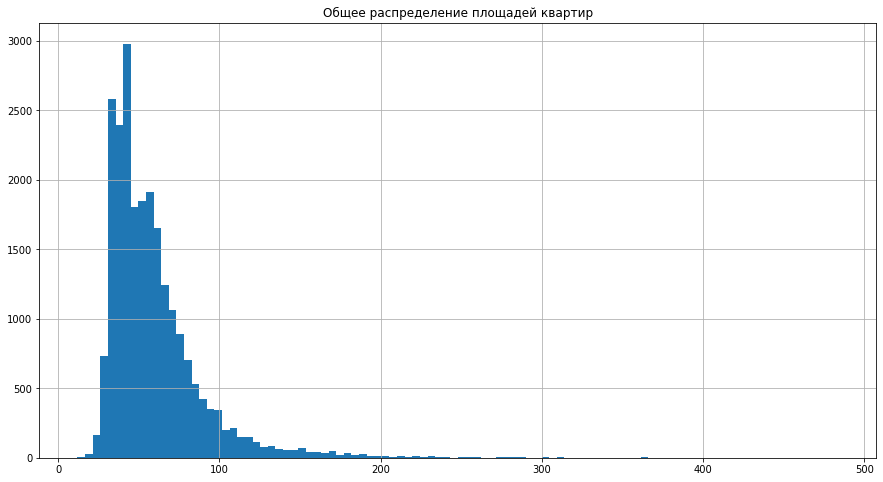

In [57]:
data['total_area'].hist(bins=100, figsize=(15, 8))
plt.title('Общее распределение площадей квартир')
plt.show()



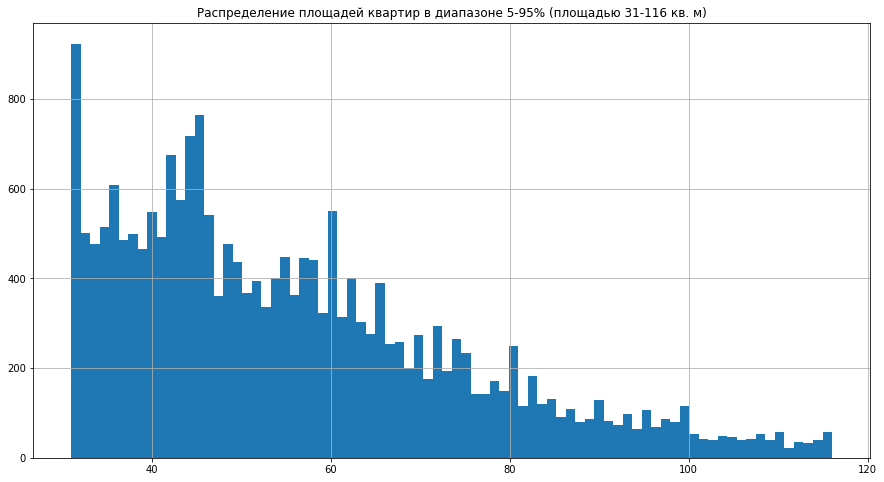

In [58]:
data['total_area'].hist(bins=80, figsize=(15, 8), range=(31, 116))
plt.title('Распределение площадей квартир в диапазоне 5-95% (площадью 31-116 кв. м)')
plt.show()

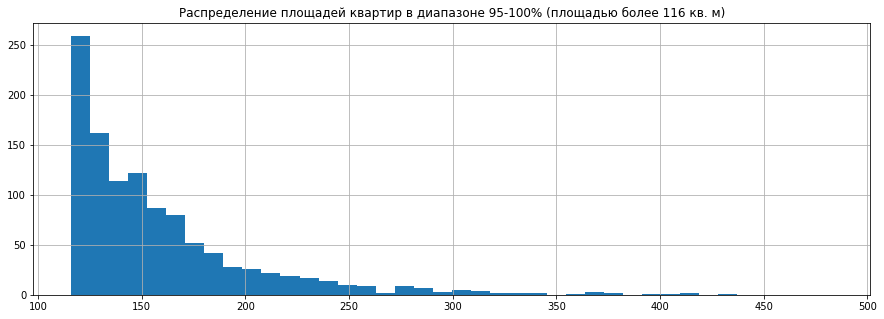

In [59]:
data['total_area'].hist(bins=40, figsize=(15, 5), range=(116, 483))
plt.title('Распределение площадей квартир в диапазоне 95-100% (площадью более 116 кв. м)')
plt.show()

Основное количество квартир площадью от 31 до 116 кв. м., средняя площадь - 59,65 кв. м, медианная - 52 кв. м.

Медиана близка к среднему, значит, выбросы не сильно портят картину.

Значения выше 300 малы, возможно, какая-то элитная недвижимость или ошибка в данных (например, в базу по квартирам закрались дома).


#### Жилая площадь

In [60]:
data['living_area'].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])


count    21897.000000
mean        34.504159
std         20.495257
min          2.000000
5%          15.260000
25%         18.900000
50%         30.100000
75%         42.800000
95%         69.160000
99%        112.000800
max        312.500000
Name: living_area, dtype: float64

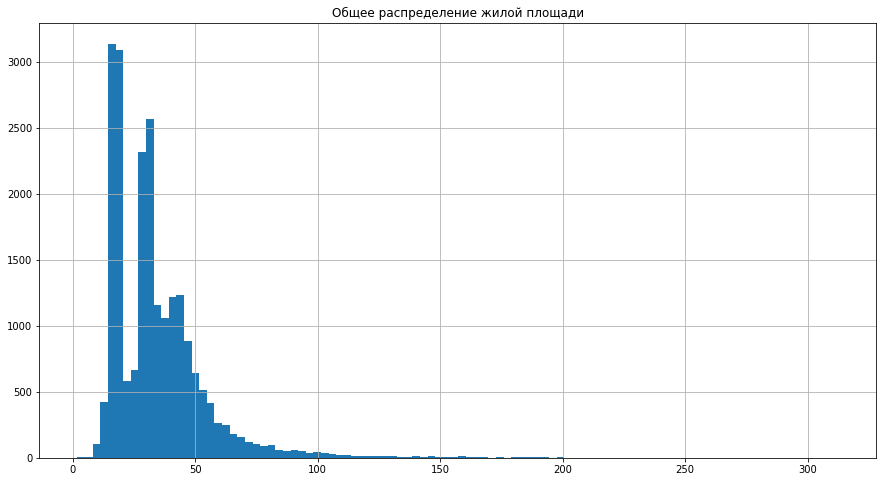

In [61]:
data['living_area'].hist(bins=100, figsize=(15, 8))
plt.title('Общее распределение жилой площади')
plt.show()

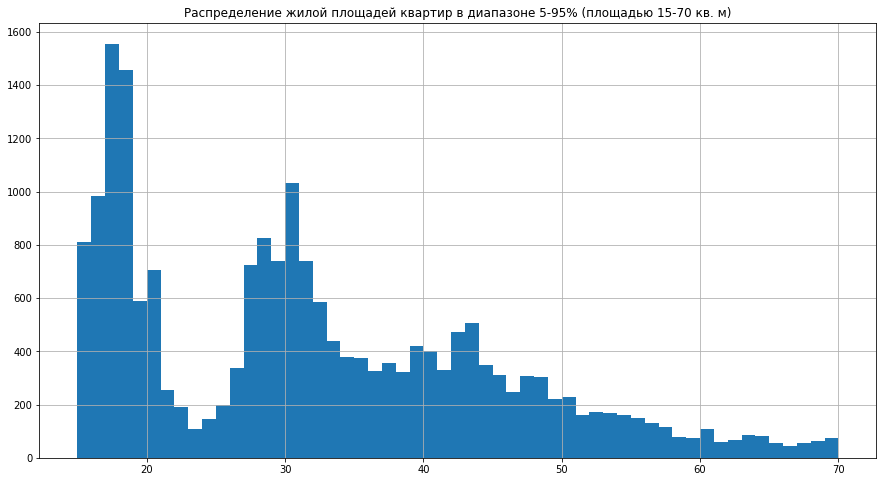

In [62]:
data['living_area'].hist(bins=55, figsize=(15, 8), range=(15, 70))
plt.title('Распределение жилой площадей квартир в диапазоне 5-95% (площадью 15-70 кв. м)')
plt.show()

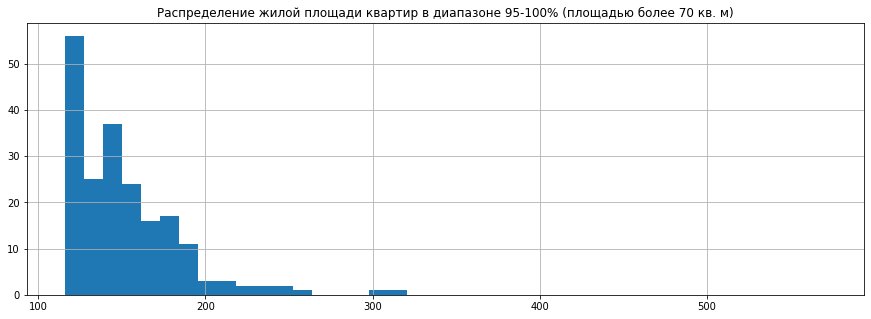

In [63]:
data['living_area'].hist(bins=40, figsize=(15, 5), range=(116, 571))
plt.title('Распределение жилой площади квартир в диапазоне 95-100% (площадью более 70 кв. м)')
plt.show()

В целом соответствует распределению общей площади. Пики на втором графике, видимо, показывают комнатность квартиры.


#### Площадь кухни

In [64]:
data['kitchen_area'].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])


count    21897.000000
mean        25.163269
std         13.958742
min          0.820000
5%          12.500000
25%         17.000000
50%         22.000000
75%         29.000000
95%         48.900000
99%         78.712000
max        339.300000
Name: kitchen_area, dtype: float64

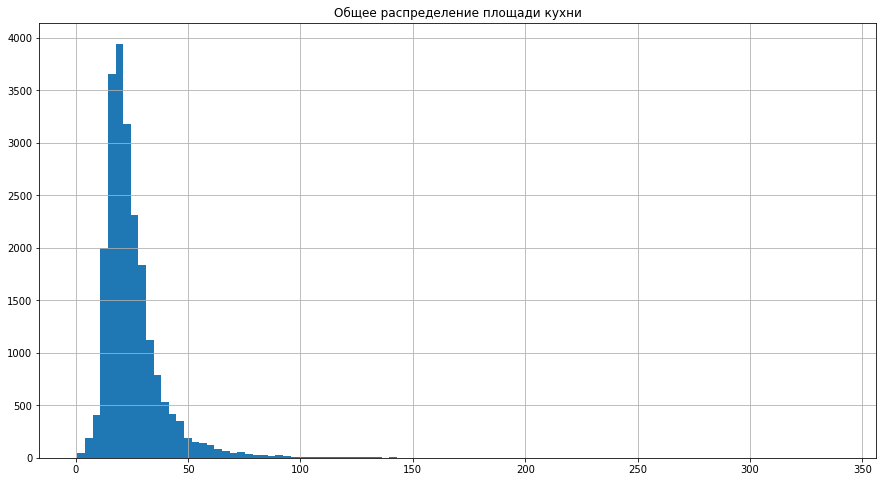

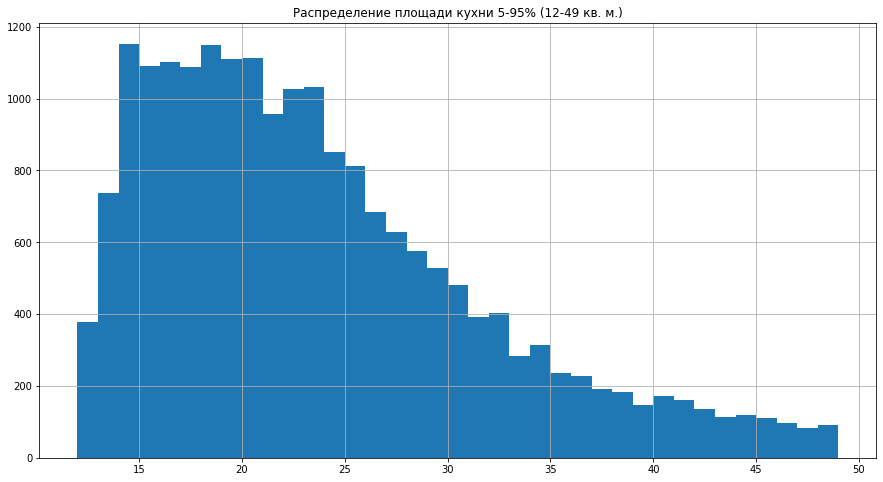

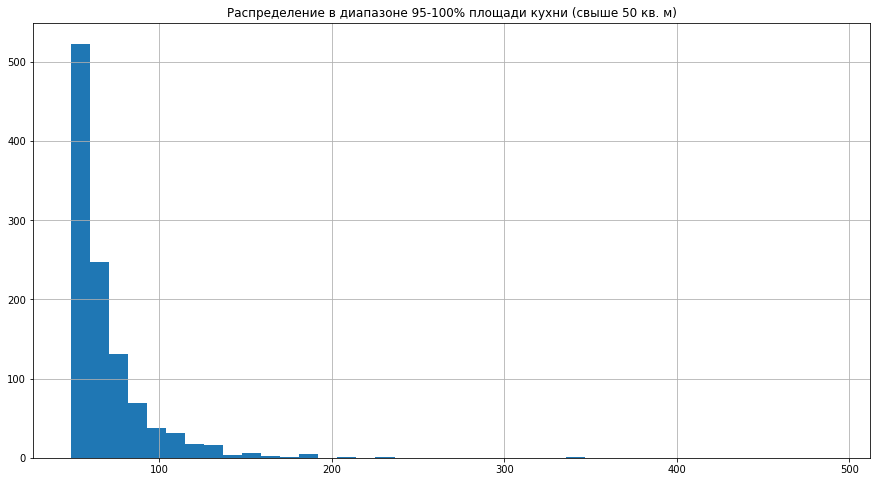

In [65]:
data['kitchen_area'].hist(bins=100, figsize=(15, 8))
plt.title('Общее распределение площади кухни')
plt.show()

data['kitchen_area'].hist(bins=37, figsize=(15, 8), range=(12, 49))
plt.title('Распределение площади кухни 5-95% (12-49 кв. м.)')
plt.show()

data['kitchen_area'].hist(bins=40, figsize=(15, 8), range=(49, 490))
plt.title('Распределение в диапазоне 95-100% площади кухни (свыше 50 кв. м)')
plt.show()



Самые популярные кухни имеют площадь от 14 до 24 кв. м. Довольно много кухонь площадью около 50 кв. м.

#### Комнатность

In [66]:
data['rooms'].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])


count    23324.000000
mean         2.075373
std          1.017311
min          1.000000
5%           1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          4.000000
99%          5.000000
max          7.000000
Name: rooms, dtype: float64

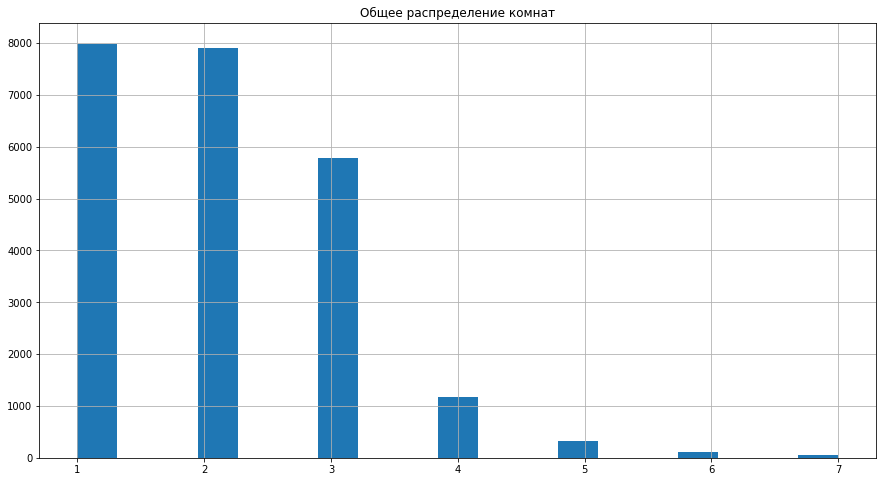

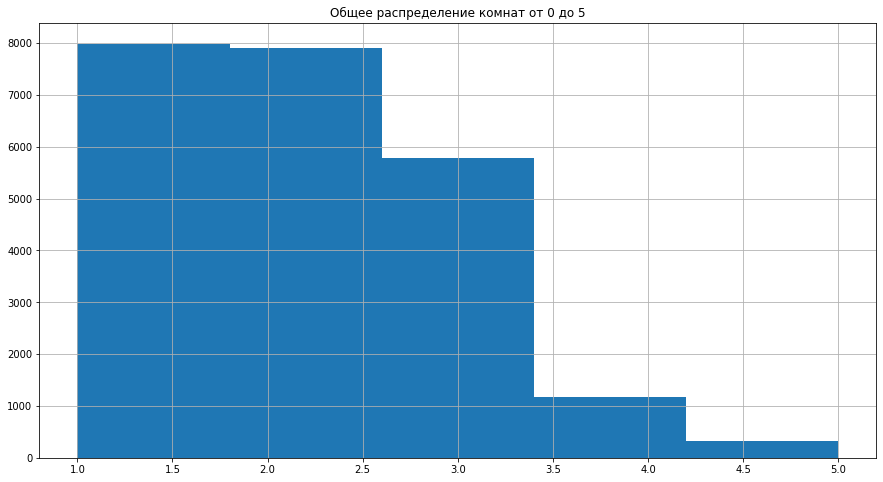

In [67]:
data['rooms'].hist(bins=19, figsize=(15, 8))
plt.title('Общее распределение комнат')
plt.show()

data['rooms'].hist(bins=5, figsize=(15, 8), range=(1, 5))
plt.title('Общее распределение комнат от 0 до 5')
plt.show()

Видно, что большинство квартир имеет от 1 до 3 комнат. 5- и более комнатные - редки, целесообразно сгруппировать их в отдельную категорию.

Посмотрим, как зависит общая площадь от количества комнат

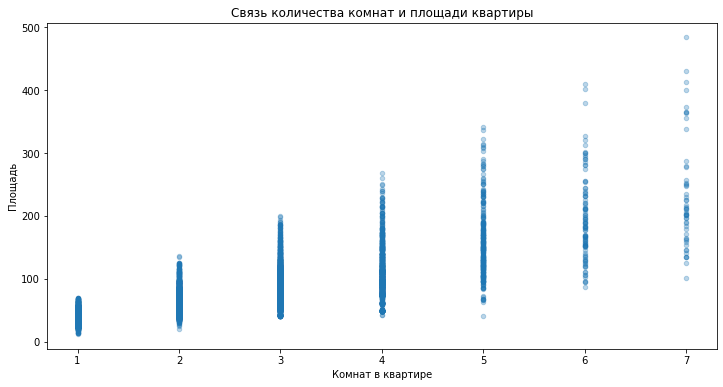

In [68]:
data.plot.scatter(y='total_area', x='rooms', alpha=.3, figsize=(12, 6))
plt.title('Связь количества комнат и площади квартиры')
plt.xlabel('Комнат в квартире')
plt.ylabel('Площадь')
plt.show()

In [69]:
rooms = data.pivot_table(index='rooms', values='total_area', aggfunc=['median', 'mean', 'count'])

rooms.columns = rooms.columns.droplevel(1)
rooms = rooms.rename(columns={'median': 'total_area_median', 'mean': 'total_area_mean', 'total_area' : 'count'})

rooms

,total_area_median,total_area_mean,count
rooms,,,
1,36.5,37.353095,7988
2,53.0,55.701139,7913
3,72.8,77.309045,5783
4,99.0,105.772058,1166
5,145.0,154.677956,318
6,183.7,196.122816,103
7,210.4,233.245283,53


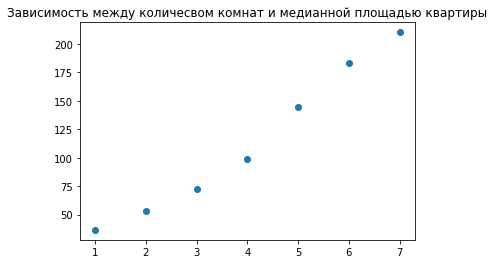

In [70]:
plt.scatter(rooms.index, rooms['total_area_median'])
plt.title('Зависимость между количесвом комнат и медианной площадью квартиры')
plt.show()

График хорошо отражает корреляцию между комнатностью и площадью до 7 комнат

#### Высота потолков

In [71]:
data['ceiling_height'].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])


count    23324.000000
mean         2.697603
std          0.274626
min          1.000000
5%           2.500000
25%          2.600000
50%          2.650000
75%          2.700000
95%          3.100000
99%          3.560000
max         20.000000
Name: ceiling_height, dtype: float64

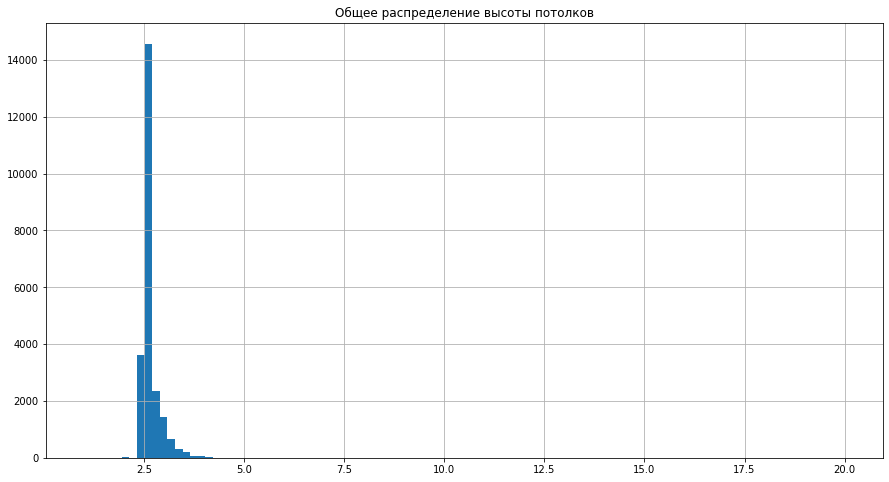

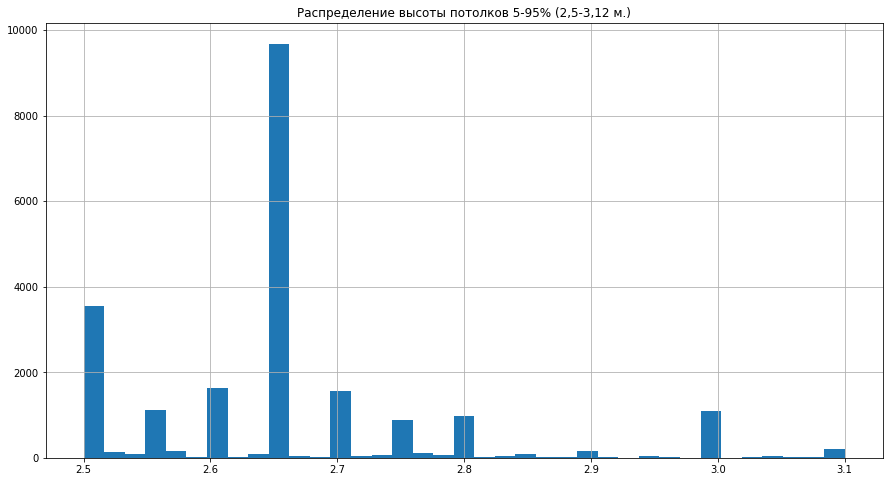

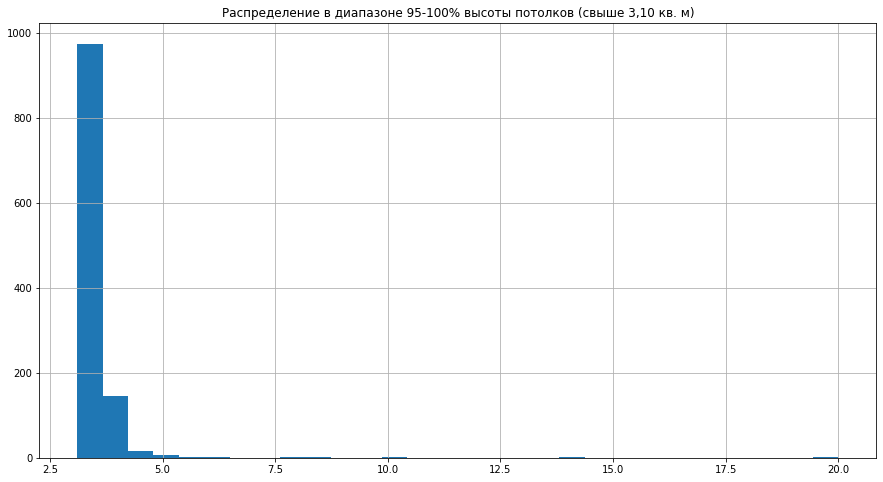

In [72]:
data['ceiling_height'].hist(bins=100, figsize=(15, 8))
plt.title('Общее распределение высоты потолков')
plt.show()

data['ceiling_height'].hist(bins=37, figsize=(15, 8), range=(2.5, 3.10))
plt.title('Распределение высоты потолков 5-95% (2,5-3,12 м.)')
plt.show()

data['ceiling_height'].hist(bins=30, figsize=(15, 8), range=(3.11, 20))
plt.title('Распределение в диапазоне 95-100% высоты потолков (свыше 3,10 кв. м)')
plt.show()



10-метровые и выше потолки выделяются. Скорее всего данные ошибочны.

Основной интервал — 2,5—3,1 м, что вполне правдоподобно. Самая популярная высота — 2,65 м.

#### Цена

In [73]:
data['last_price'].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])


count    2.332400e+04
mean     6.308732e+06
std      7.695148e+06
min      4.300000e+05
5%       1.870000e+06
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
95%      1.495000e+07
99%      3.300000e+07
max      3.300000e+08
Name: last_price, dtype: float64

In [74]:
#Многовато нулей. Прведем к тысячам, заодно и столбец с ценой за кв. м.
data['last_price'] = data['last_price'] / 1000
data['price_per_1m'] = data['price_per_1m'] / 1000


In [75]:
data['last_price'].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])

count     23324.000000
mean       6308.731659
std        7695.148118
min         430.000000
5%         1870.000000
25%        3450.000000
50%        4650.000000
75%        6750.000000
95%       14950.000000
99%       33000.000000
max      330000.000000
Name: last_price, dtype: float64

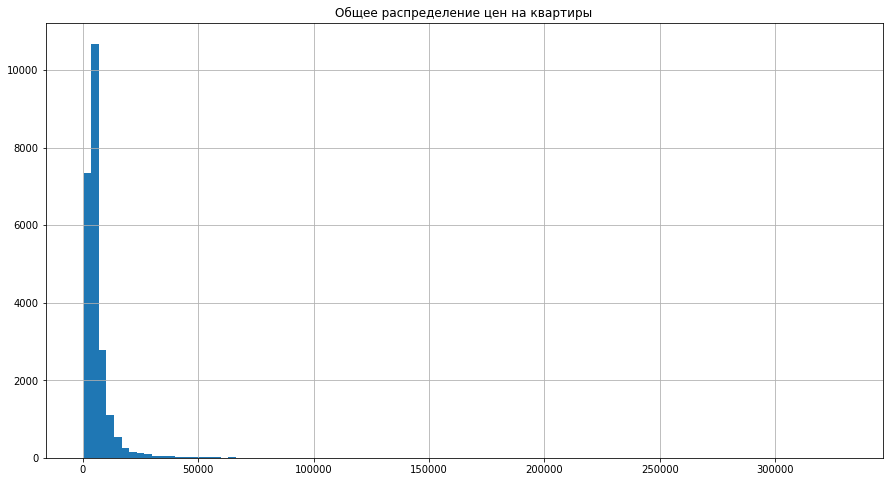

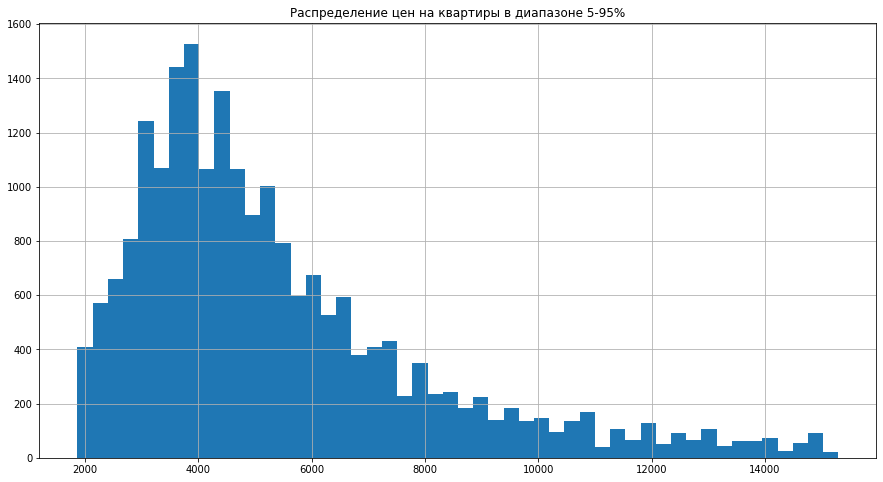

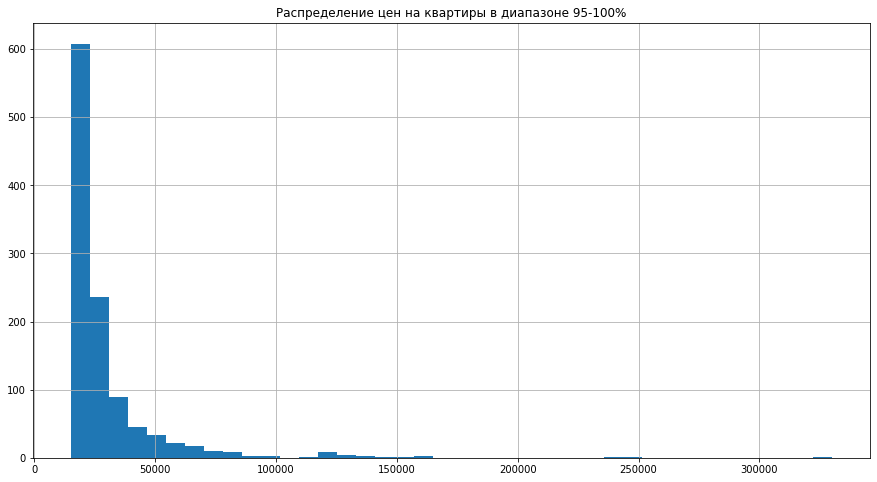

In [76]:
data['last_price'].hist(bins=100, figsize=(15, 8))
plt.title('Общее распределение цен на квартиры')
plt.show()

data['last_price'].hist(bins=50, figsize=(15, 8), range=(1864, 15300))
plt.title('Распределение цен на квартиры в диапазоне 5-95%')
plt.show()

data['last_price'].hist(bins=40, figsize=(15, 8), range=(15300, 330000))
plt.title('Распределение цен на квартиры в диапазоне 95-100%')
plt.show()



Средняя стоимость - ~6,3 млн, медианная ~4,5. Существенная разница, видимо, из-за дорогих квартир (свыше 763 млн руб.).

In [77]:
data.query('last_price > 150000')

,locality_short_name,locality_type,last_price,price_per_1m,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,floor_status,is_apartment,studio,open_plan,total_images,days_exposition,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_range_km,airport_range_km,park_range_km,pond_range_km
13749,Санкт-Петербург,Санкт-Петербург,240000.0,585.36585,410.0,218.0,192.0,3.40,6,0,7,7.0,последний,False,False,False,7,199.0,2017-04-01,Saturday,April,2017,5.0,32.440,NaN,0.198
1026,Санкт-Петербург,Санкт-Петербург,155000.0,500.00000,310.0,190.0,120.0,5.30,5,2,3,3.0,последний,False,False,False,20,NaN,2018-10-12,Friday,October,2018,5.0,24.899,NaN,0.603
16461,Санкт-Петербург,Санкт-Петербург,245000.0,857.54288,285.7,182.8,102.9,3.35,6,0,4,7.0,другой,False,False,False,17,249.0,2017-04-10,Monday,April,2017,6.0,33.143,0.400,0.140
16495,Санкт-Петербург,Санкт-Петербург,159000.0,611.53846,260.0,180.0,80.0,2.65,4,2,4,5.0,другой,False,False,False,12,178.0,2017-04-04,Tuesday,April,2017,0.0,21.740,0.138,0.620
19155,Санкт-Петербург,Санкт-Петербург,160000.0,658.43621,243.0,145.0,98.0,2.65,5,0,4,5.0,другой,False,False,False,20,18.0,2018-11-12,Monday,November,2018,1.0,22.640,0.285,0.200
2536,Санкт-Петербург,Санкт-Петербург,159984.0,660.00000,242.4,131.0,111.4,3.85,4,0,7,9.0,другой,False,False,False,16,501.0,2015-08-27,Thursday,August,2015,2.0,21.946,0.679,0.227
1436,Санкт-Петербург,Санкт-Петербург,330000.0,1736.84211,190.0,95.0,95.0,3.50,3,0,5,7.0,другой,False,False,False,19,233.0,2018-04-04,Wednesday,April,2018,1.0,23.011,0.519,0.285


Дорогие квартиры с огромной площадью и огромной ценой. Тем не менее имеют право на существование

In [78]:
data['price_per_1m'].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])

count    23324.000000
mean        98.806472
std         46.693375
min          7.962960
5%          41.122532
25%         76.470590
50%         94.827590
75%        113.947558
95%        159.938212
99%        255.546829
max       1736.842110
Name: price_per_1m, dtype: float64

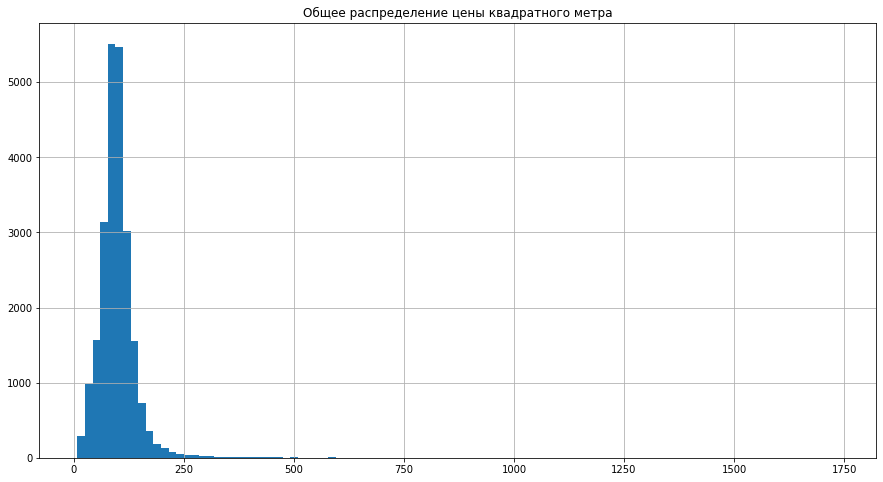

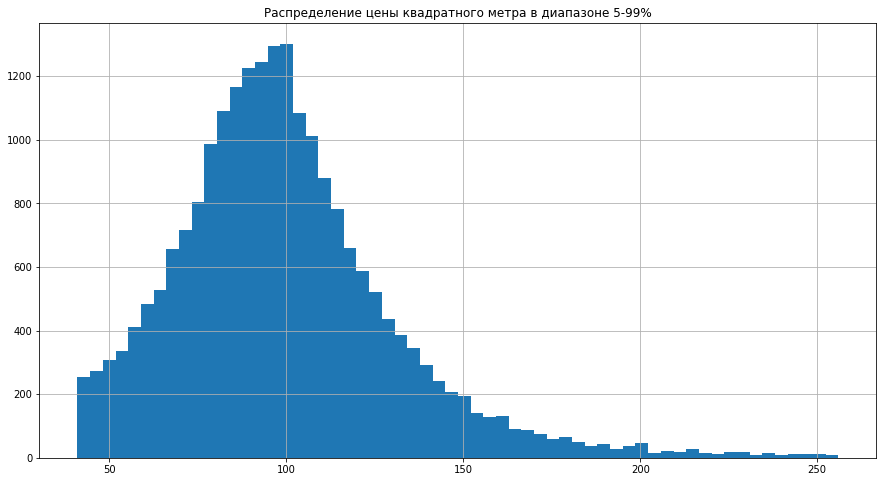

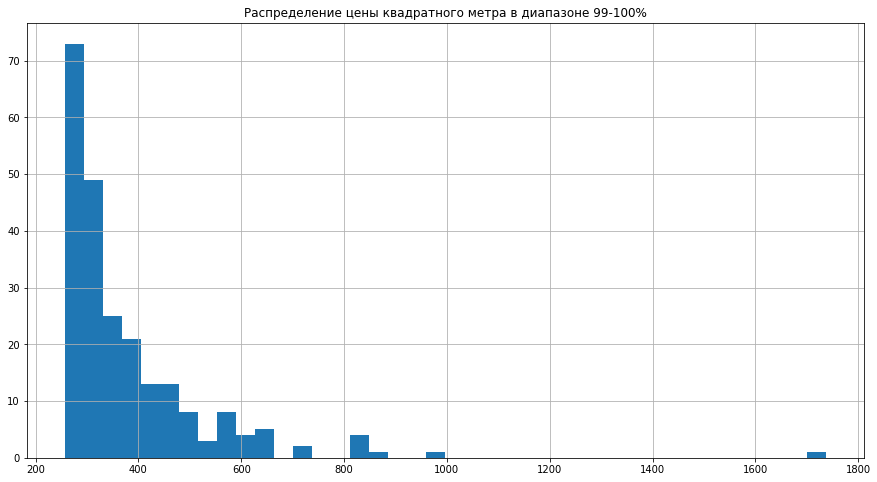

In [79]:
data['price_per_1m'].hist(bins=100, figsize=(15, 8))
plt.title('Общее распределение цены квадратного метра')
plt.show()

data['price_per_1m'].hist(bins=60, figsize=(15, 8), range=(41, 256))
plt.title('Распределение цены квадратного метра в диапазоне 5-99%')
plt.show()

data['price_per_1m'].hist(bins=40, figsize=(15, 8), range=(257, 1737))
plt.title('Распределение цены квадратного метра в диапазоне 99-100%')
plt.show()



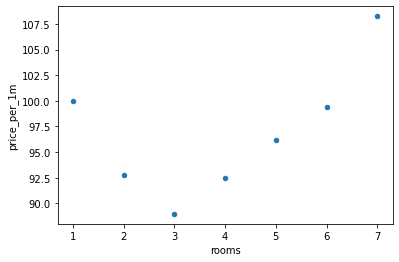

In [80]:
(
    data.query('rooms <= 7')
        .pivot_table(index='rooms', values=['last_price', 'price_per_1m'], aggfunc='median').reset_index()
        .plot(kind='scatter', x='rooms', y='price_per_1m')
)
plt.show()

Видно, что стоимость квардратного метра очень высока для студий/сваободной планировки, с ростом количества комнат до трех падает на минимум и дальше опять растет.

5-7-комнатные квартиры, возможно, имеют столь высокую цену метра по причине того, что это старый жилой фонд (сейчас редко строят больше 4 комнат), соответственно, расположены в центре, что еще сильнее повышет стоимость

#### Этаж квартиры и этажность дома

In [81]:
data['floor'].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])


count    23324.000000
mean         5.871291
std          4.867606
min          1.000000
5%           1.000000
25%          2.000000
50%          4.000000
75%          8.000000
95%         16.000000
99%         23.000000
max         33.000000
Name: floor, dtype: float64

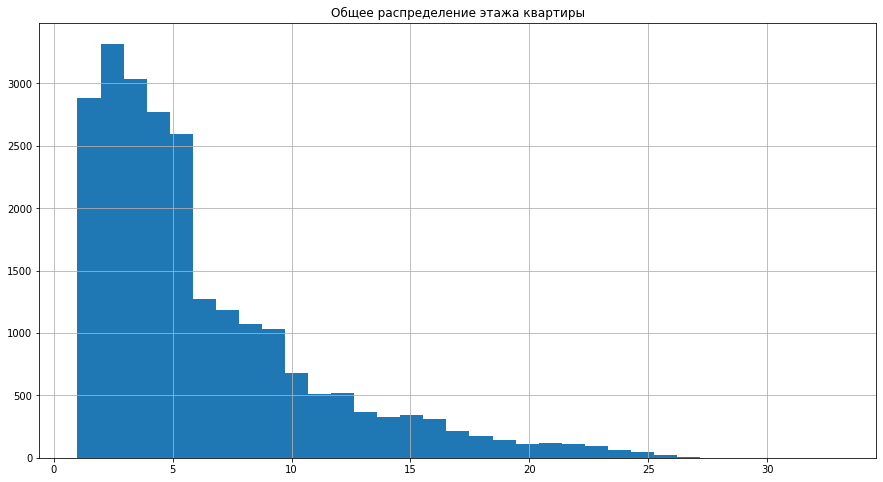

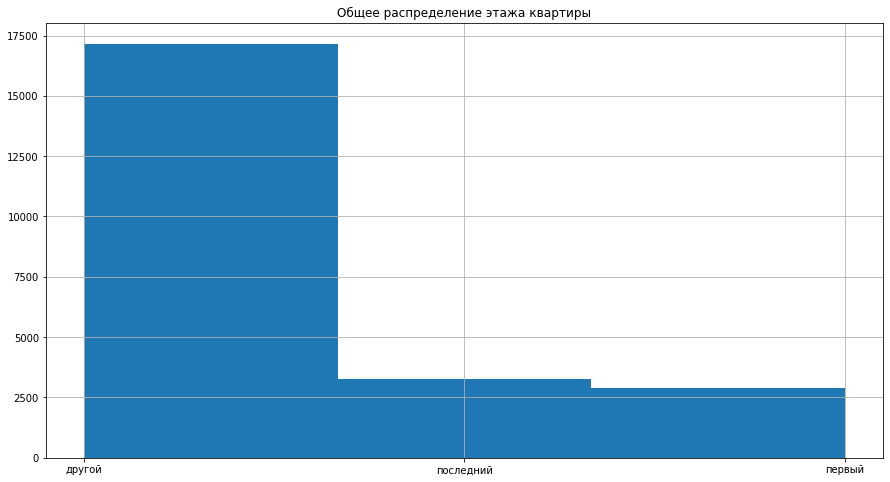

In [82]:
data['floor'].hist(bins=33, figsize=(15, 8))
plt.title('Общее распределение этажа квартиры')
plt.show()

data['floor_status'].hist(bins=3, figsize=(15, 8))
plt.title('Общее распределение этажа квартиры')
plt.show()



In [83]:
floor_status_prices = data.query('rooms <= 7').pivot_table(index='floor_status', values='last_price', columns='rooms')

floor_status_prices

rooms,1,2,3,4,5,6,7
floor_status,,,,,,,
другой,3935.152931,5957.429823,8576.380396,13962.066964,22004.360324,28921.924629,31153.714286
первый,3142.395493,4155.749917,5829.533855,8037.541843,12076.274435,15915.775000,29316.815200
последний,3373.104542,4740.639727,7435.402512,13009.055793,26524.023710,37106.520000,24251.538462


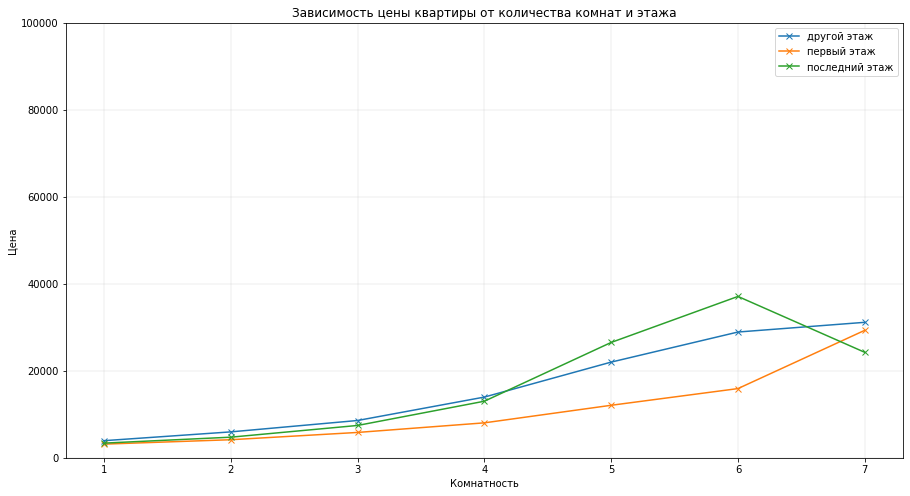

In [84]:
fig, ax = plt.subplots(figsize=(15, 8))

[ax.plot(floor_status_prices.columns, floor_status_prices.loc[i], marker ='x', label=f'{i} этаж') for i in floor_status_prices.index]

plt.xlabel('Комнатность')
plt.ylabel('Цена')

plt.ylim(0, 100000)

plt.xticks(floor_status_prices.columns)

plt.grid(linestyle='-', linewidth=0.2)

plt.legend(loc='upper right')

plt.title('Зависимость цены квартиры от количества комнат и этажа')

plt.show()
    

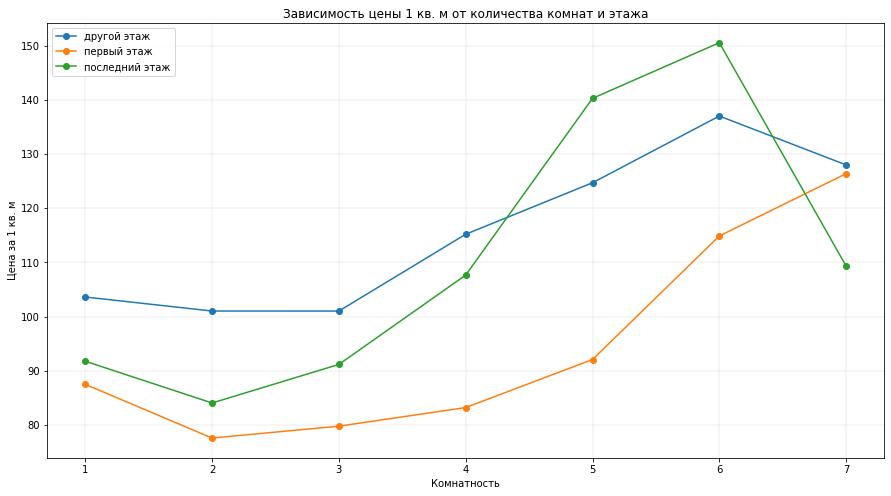

In [85]:
floor_status_prices_per_1m = data.query('rooms <= 7').pivot_table(index='floor_status', values='price_per_1m', columns='rooms')


fig, ax = plt.subplots(figsize=(15, 8))

[ax.plot(floor_status_prices_per_1m.columns, floor_status_prices_per_1m.loc[i], marker ='o', label=f'{i} этаж') for i in floor_status_prices_per_1m.index]

plt.xlabel('Комнатность')
plt.ylabel('Цена за 1 кв. м')

#plt.ylim(0, 100000)

plt.xticks(floor_status_prices_per_1m.columns)

plt.grid(linestyle='-', linewidth=0.2)

plt.legend(loc='upper left')

plt.title('Зависимость цены 1 кв. м от количества комнат и этажа')

plt.show()
    

Количество квартир в основном не на крайних этажа, что ожидаемо. Цена выше на средних, что тоже объяснимо. Верхнее этаж дороже первых, возможно, из-за наличия пентхаусов и прочей элитной недвижимости.

#### Расстояния

In [86]:
data[['city_center_range_km', 'airport_range_km', 'park_range_km', 'pond_range_km']].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])

,city_center_range_km,airport_range_km,park_range_km,pond_range_km
count,17906.000000,17886.000000,7964.000000,8941.000000
mean,14.235452,28.836398,0.490774,0.519246
std,8.626940,12.651546,0.342626,0.277806
min,0.000000,0.000000,0.001000,0.013000
5%,4.000000,11.597000,0.095000,0.092000
25%,9.000000,18.573000,0.288000,0.295000
50%,13.000000,26.782500,0.454000,0.503000
75%,16.000000,37.350250,0.612000,0.731000
95%,32.000000,51.340000,0.967850,0.978000
99%,50.000000,58.576700,2.102000,1.159000


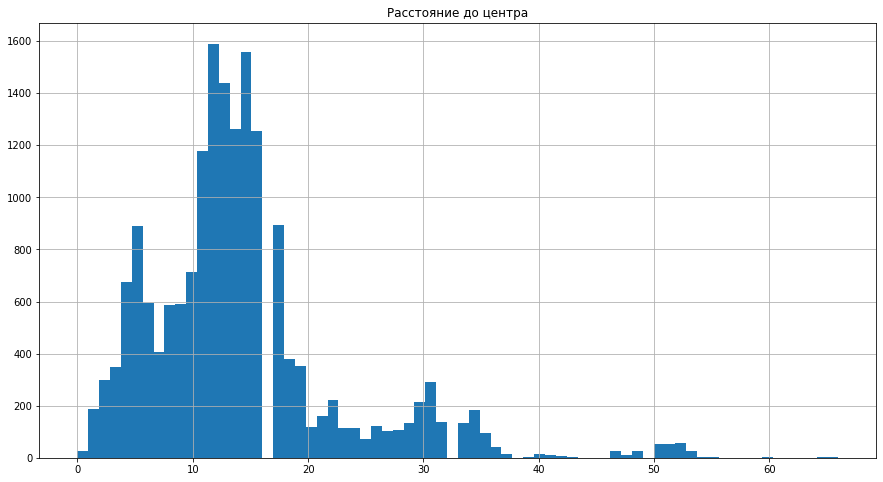

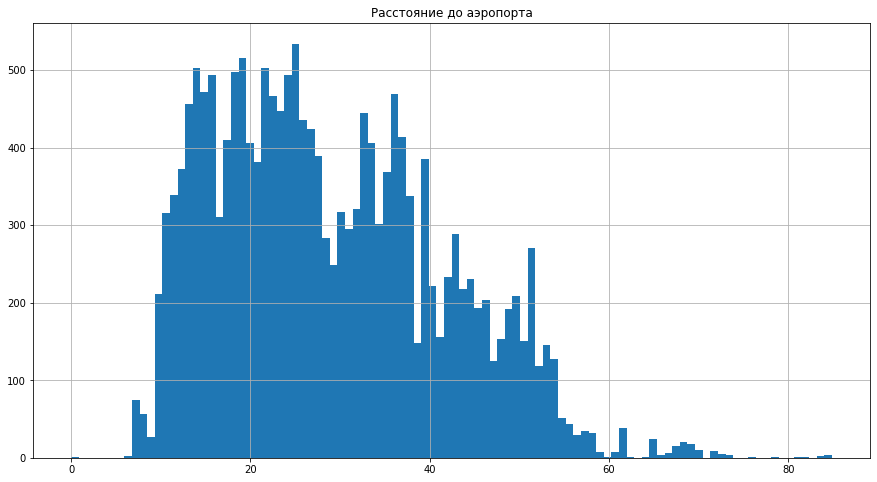

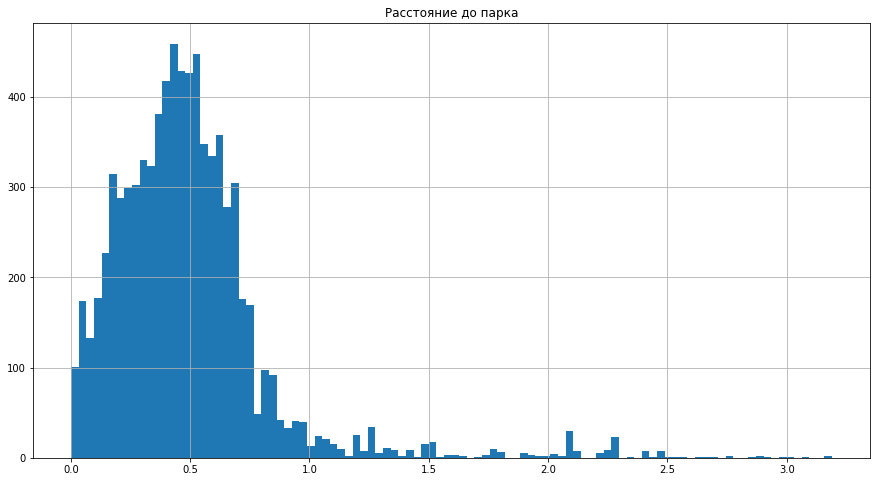

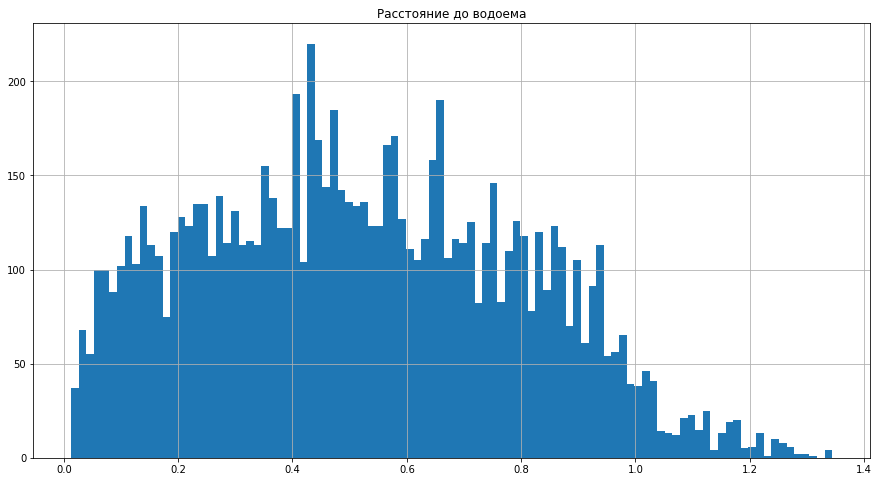

In [87]:
data['city_center_range_km'].hist(bins=70, figsize=(15,8))
plt.title('Расстояние до центра')
plt.show()


data['airport_range_km'].hist(bins=100, figsize=(15,8))
plt.title('Расстояние до аэропорта')
plt.show()

data['park_range_km'].hist(bins=100, figsize=(15,8))
plt.title('Расстояние до парка')
plt.show()

data['pond_range_km'].hist(bins=100, figsize=(15,8))
plt.title('Расстояние до водоема')
plt.show()


Расстояния до центра имеет два заметных пика - 5 и 15 км. Видимо, первое - это для пригородов, второе - для Санкт-Петербурга. 

До аэропорта - от 8 до 40 км. Есть подозрительные значения около нуля.

А водоем и парк - в радиусе километра у чуть больше трети квартир. У большинста, правда, эти данные не указаны.


In [88]:
data[['day_of_week_exposition', 'month_exposition']].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])

,day_of_week_exposition,month_exposition
count,23324,23324
unique,7,12
top,Thursday,February
freq,4222,2608


<AxesSubplot:>

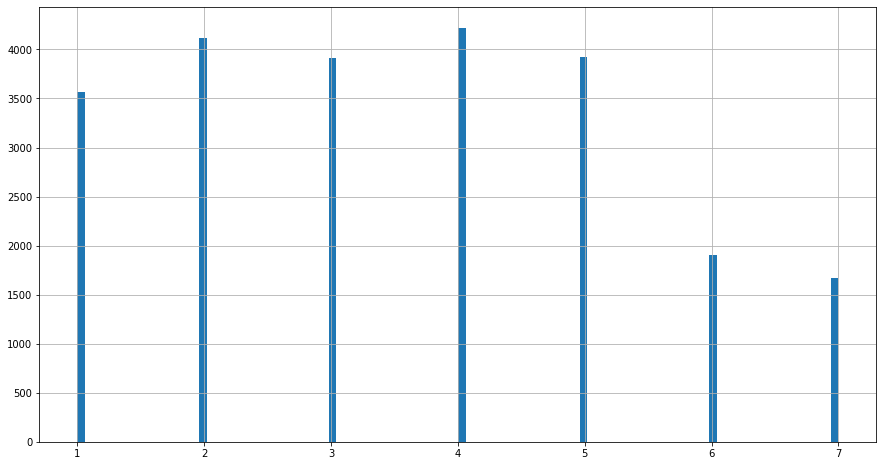

In [89]:

data['day_of_week_exposition'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}).hist(bins=100, figsize=(15, 8))

<AxesSubplot:>

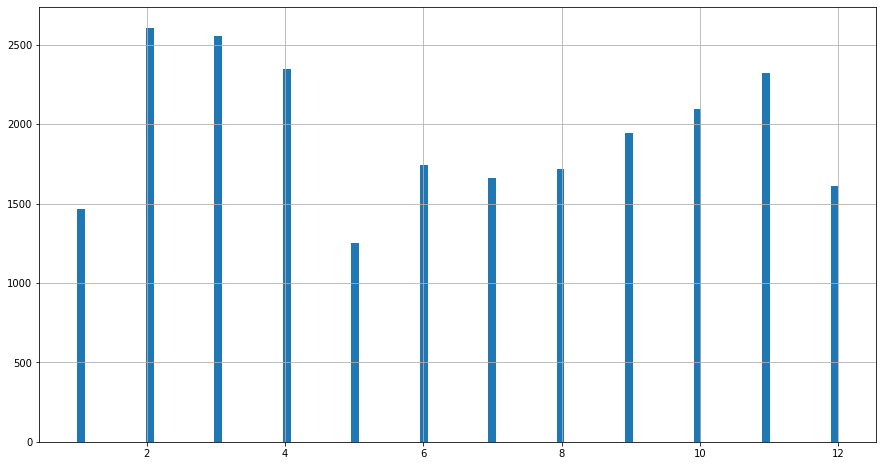

In [90]:
months = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}


data['month_exposition'].map(months).hist(bins=100, figsize=(15, 8))

Меньше всего квартир продается по выходным, из будней - по понедельникам. 

По месяцам самые "урожайные" - февраль, март, апрель и ноябрь. Летом заметен очевидный спад (из-за сезона отпусков). Январь и май проседают из-за большого количества праздничных дней

#### Дата объявления

In [91]:
data['first_day_exposition'].describe().to_frame()

C:\Users\apple\AppData\Local\Temp\ipykernel_21992\2998399310.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['first_day_exposition'].describe().to_frame()


,first_day_exposition
count,23324
unique,1489
top,2018-02-01 00:00:00
freq,360
first,2014-11-27 00:00:00
last,2019-05-03 00:00:00


In [92]:
data['days_exposition'].describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])

count    20186.000000
mean       181.041712
std        219.471917
min          1.000000
5%           9.000000
25%         45.000000
50%         96.000000
75%        232.000000
95%        647.000000
99%       1069.000000
max       1580.000000
Name: days_exposition, dtype: float64

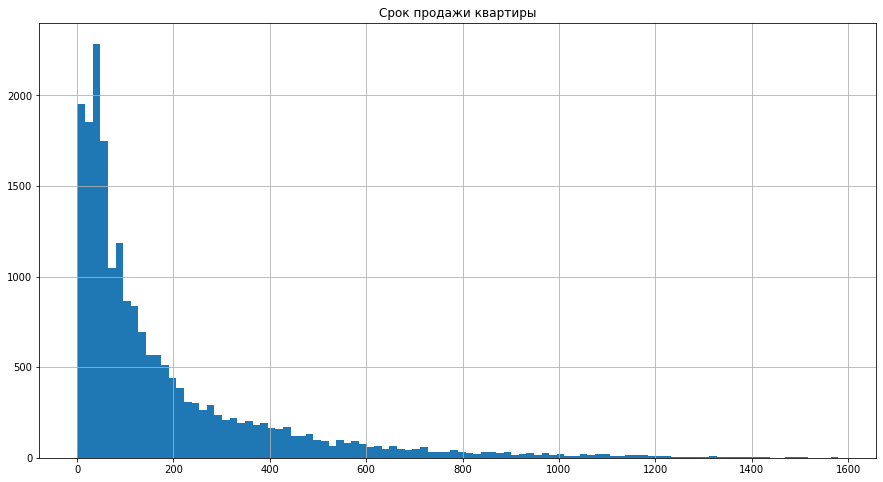

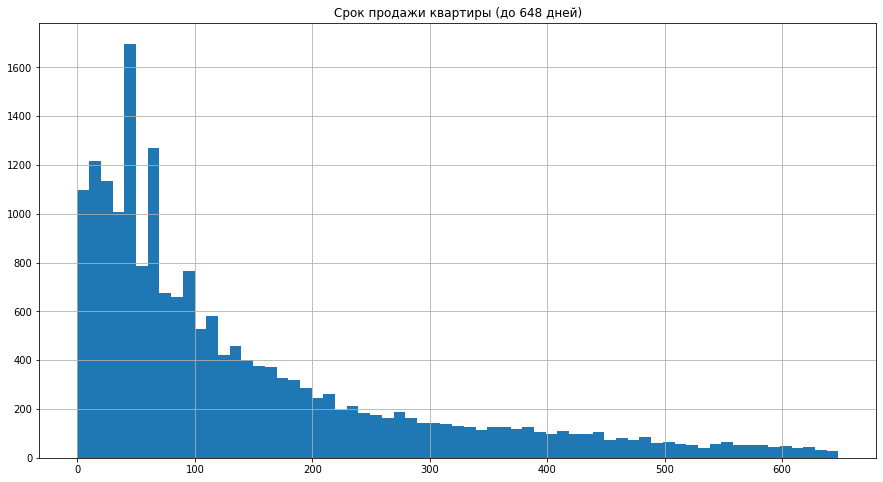

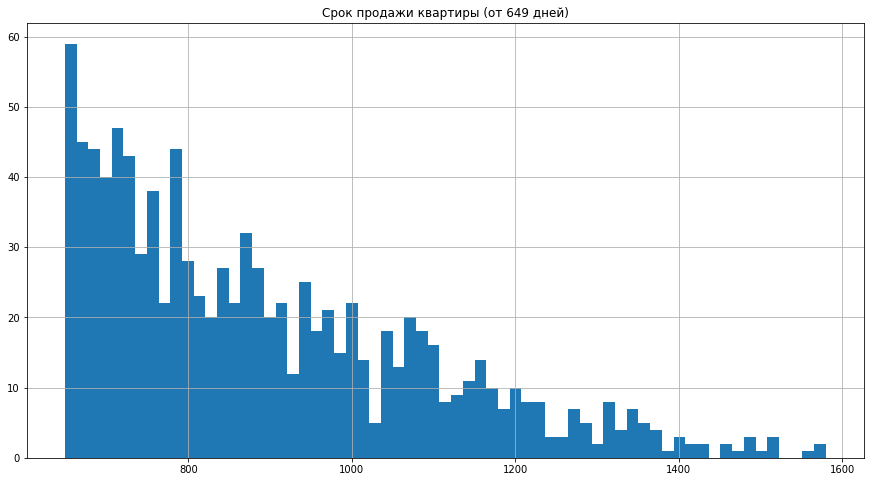

In [93]:
data['days_exposition'].hist(bins=100, figsize=(15,8))
plt.title('Срок продажи квартиры')
plt.show()

data['days_exposition'].hist(bins=65, figsize=(15,8), range=(0, 648))
plt.title('Срок продажи квартиры (до 648 дней)')
plt.show()

data['days_exposition'].hist(bins=65, figsize=(15,8), range=(649, 1580))
plt.title('Срок продажи квартиры (от 649 дней)')
plt.show()

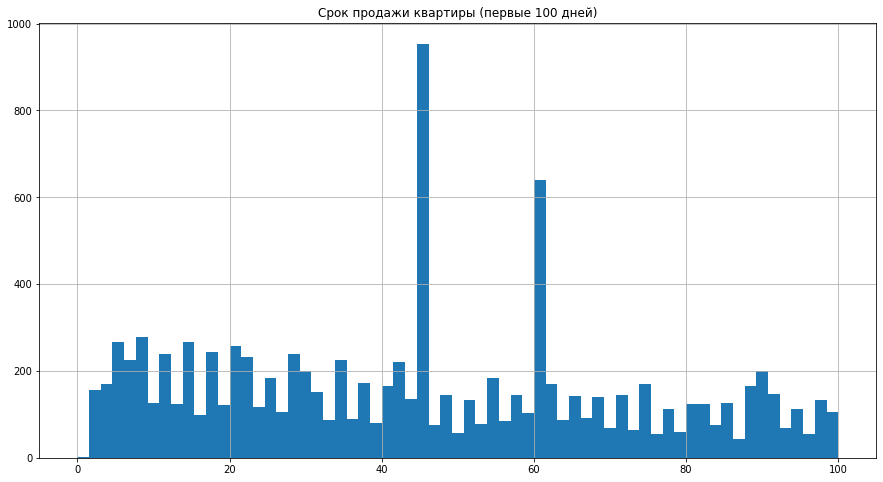

In [94]:
data['days_exposition'].hist(bins=65, figsize=(15,8), range=(0, 100))
plt.title('Срок продажи квартиры (первые 100 дней)')
plt.show()

Пики на 45 и 60 днях. Вероятно, это не продажи, а закончившийся срок жизни объявления о продаже. 

In [95]:
data.head()

,locality_short_name,locality_type,last_price,price_per_1m,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,floor_status,is_apartment,studio,open_plan,total_images,days_exposition,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_range_km,airport_range_km,park_range_km,pond_range_km
660,Санкт-Петербург,Санкт-Петербург,49950.0,103.22381,483.9,312.5,171.4,3.20,7,0,4,6.0,другой,False,False,False,3,391.0,2017-10-04,Wednesday,October,2017,1.0,23.079,0.461,0.022
21955,Санкт-Петербург,Санкт-Петербург,130000.0,301.62413,431.0,220.0,211.0,3.70,7,5,5,8.0,другой,False,False,False,19,161.0,2017-10-02,Monday,October,2017,NaN,NaN,NaN,NaN
14991,Санкт-Петербург,Санкт-Петербург,45000.0,108.82709,413.5,74.2,339.3,2.65,7,0,18,20.0,другой,False,False,False,19,182.0,2018-09-20,Thursday,September,2018,4.0,18.748,NaN,NaN
13749,Санкт-Петербург,Санкт-Петербург,240000.0,585.36585,410.0,218.0,192.0,3.40,6,0,7,7.0,последний,False,False,False,7,199.0,2017-04-01,Saturday,April,2017,5.0,32.440,NaN,0.198
14088,Санкт-Петербург,Санкт-Петербург,51000.0,126.86567,402.0,300.0,102.0,3.15,6,2,6,8.0,другой,False,False,False,8,32.0,2017-02-07,Tuesday,February,2017,5.0,24.484,0.253,NaN


In [96]:
# Зависимость скорости продажи от дня недели

days_per_weekday = data.pivot_table(index='day_of_week_exposition', values='days_exposition', aggfunc='median').reset_index()

days = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}

days_per_weekday['day_of_week_exposition'] = days_per_weekday['day_of_week_exposition'].map(days)

days_per_weekday = days_per_weekday.sort_values(by='day_of_week_exposition')
days_per_weekday

,day_of_week_exposition,days_exposition
1,1,99.0
5,2,94.5
6,3,100.0
4,4,98.0
0,5,95.0
2,6,95.0
3,7,88.0


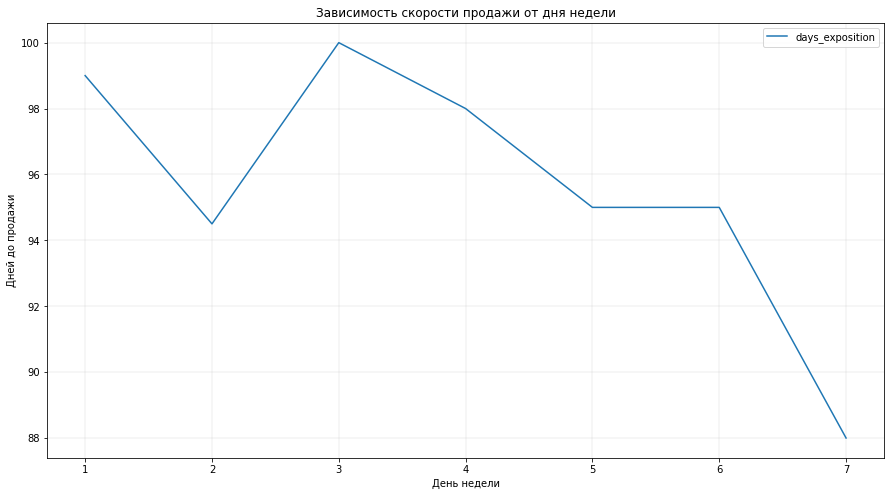

In [97]:
days_per_weekday.plot('day_of_week_exposition', 'days_exposition', figsize=(15, 8))

plt.xlabel('День недели')
plt.ylabel('Дней до продажи')

plt.grid(linestyle='-', linewidth=0.2)

plt.title('Зависимость скорости продажи от дня недели')

plt.show()

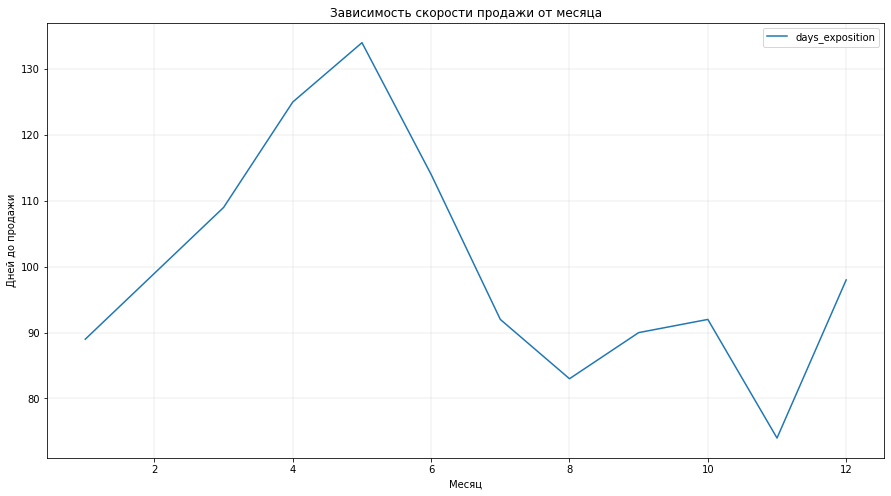

In [98]:
# Месяцы

days_per_months = data.pivot_table(index='month_exposition', values='days_exposition', aggfunc='median').reset_index()

months = {'January':1, 'Fubruary':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

days_per_months['month_exposition'] = days_per_months['month_exposition'].map(months)

days_per_months = days_per_months.sort_values(by='month_exposition')

days_per_months.plot('month_exposition', 'days_exposition', figsize=(15, 8))

plt.xlabel('Месяц')
plt.ylabel('Дней до продажи')

plt.grid(linestyle='-', linewidth=0.2)

plt.title('Зависимость скорости продажи от месяца')

plt.show()

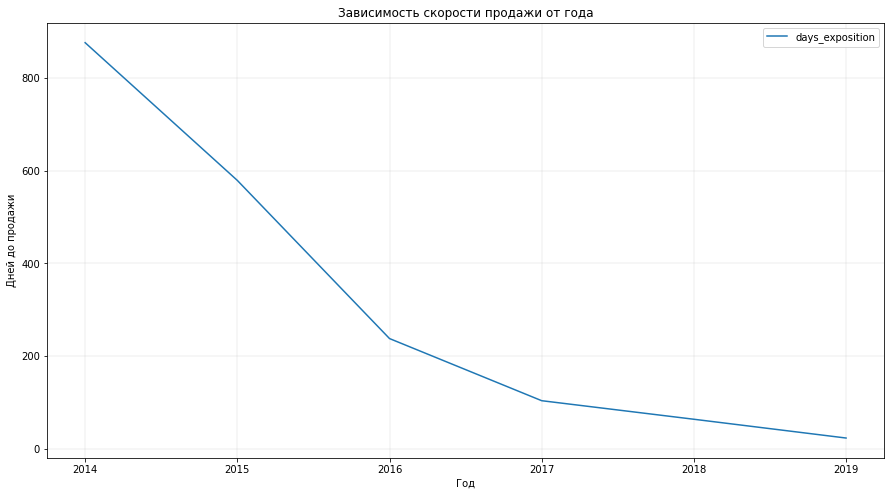

In [99]:
# Годы

days_per_year = data.pivot_table(index='year_exposition', values='days_exposition', aggfunc='median').reset_index()


days_per_year = days_per_year.sort_values(by='year_exposition')

days_per_year.plot('year_exposition', 'days_exposition', figsize=(15, 8))

plt.xlabel('Год')
plt.ylabel('Дней до продажи')

plt.grid(linestyle='-', linewidth=0.2)

plt.title('Зависимость скорости продажи от года')

plt.show()

Объявления собраны за 4,5 года.

Средний срок продажи - полгода, медианный - ~3 месяца. 

Некоторые продавцы умудряются закрыть сделку за день, четверти из них требуется полтора месяца.

"Долгие" продажи доходят до 1580 дней (4,3 года), что сильно влияет на среднее значение.

По дням недели больше всего продаж по понедельникам и средам. Понедельник, вероятно, забирает на  себя часть сделок с выходных (люди хотя отдохнуть).

По месяцам - в лидерах май, видимо, к среднему времени продажи плюсуется сезон отпусков. Зимой и осенью квартиры продаются ощутимо быстрее.

По годам очевидный тренд - уменьшение времени на продажу. Возможно, сказывается развитие технологий (мобильная связь, интернет, программное обеспечение etc.) 



### "Какие факторы больше всего влияют на общую (полную) стоимость объекта?

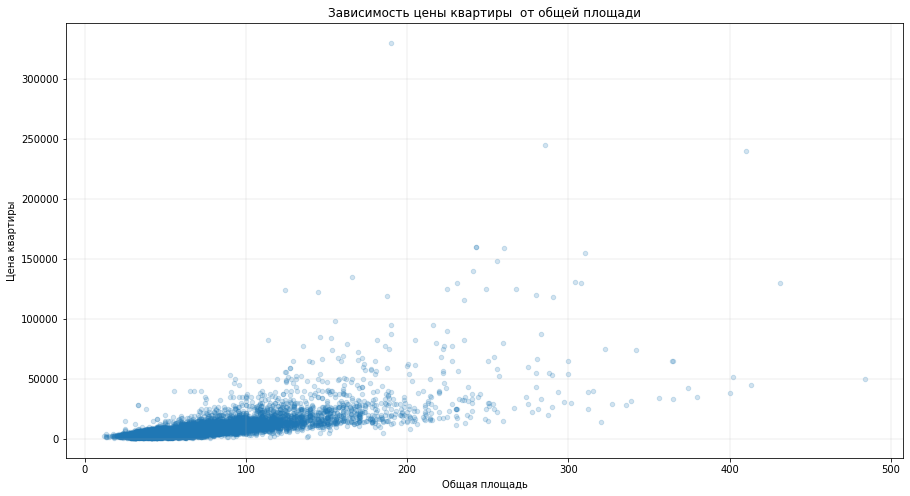

In [100]:
# Зависимость стоимости от площади

data.plot.scatter(x='total_area', y='last_price', figsize=(15, 8), alpha=.2)

plt.xlabel('Общая площадь')
plt.ylabel('Цена квартиры')

plt.grid(linestyle='-', linewidth=0.2)

plt.title('Зависимость цены квартиры  от общей площади')

plt.show()

Видна явная зависимость цены от общей площади квартиры

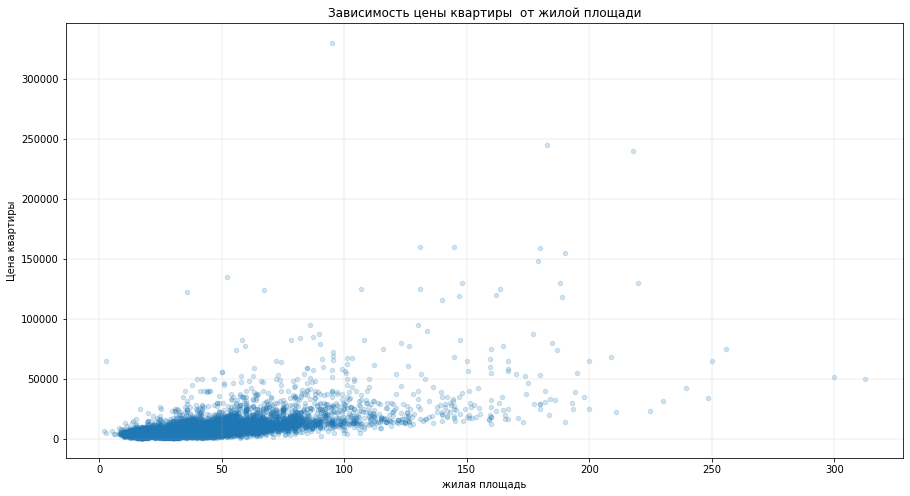

In [101]:
# Зависимость стоимости от жилой площади

data.plot.scatter(x='living_area', y='last_price', figsize=(15, 8), alpha=.2)

plt.xlabel('жилая площадь')
plt.ylabel('Цена квартиры')

plt.grid(linestyle='-', linewidth=0.2)

plt.title('Зависимость цены квартиры  от жилой площади')

plt.show()

Примерно та же картина, что и с жилой площадью

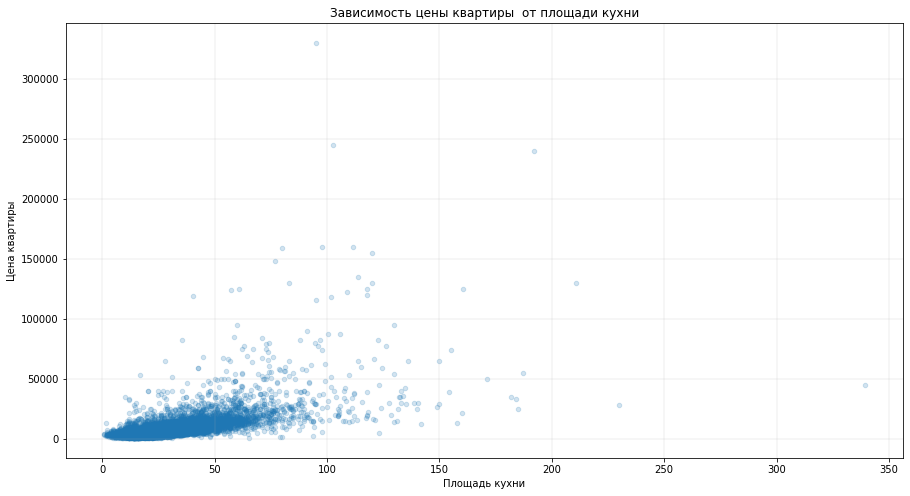

In [102]:
# Зависимость стоимости от площади кухни

data.plot.scatter(x='kitchen_area', y='last_price', figsize=(15, 8), alpha=.2)

plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры')

plt.grid(linestyle='-', linewidth=0.2)

plt.title('Зависимость цены квартиры  от площади кухни')

plt.show()

Видна чуть более явная зависимость

In [103]:
# Зависимость от комнатности
data.query('rooms <= 7').pivot_table(index='rooms', values=['days_exposition'], aggfunc=['median', 'mean'])

,median,mean
,days_exposition,days_exposition
rooms,,
1,81.0,159.207589
2,91.0,172.924819
3,114.0,203.597871
4,155.0,253.979548
5,177.0,299.280488
6,204.0,284.337838
7,148.0,210.764706


Просматривается линейная зависимость. Визуализируем.

In [104]:
sale_days_per_rooms = (
    data.query('rooms <= 7')
    .pivot_table(index='rooms', values=['days_exposition'], aggfunc=['median', 'mean']).reset_index()
    
)

sale_days_per_rooms

,rooms,median,mean
,,days_exposition,days_exposition
0,1,81.0,159.207589
1,2,91.0,172.924819
2,3,114.0,203.597871
3,4,155.0,253.979548
4,5,177.0,299.280488
5,6,204.0,284.337838
6,7,148.0,210.764706


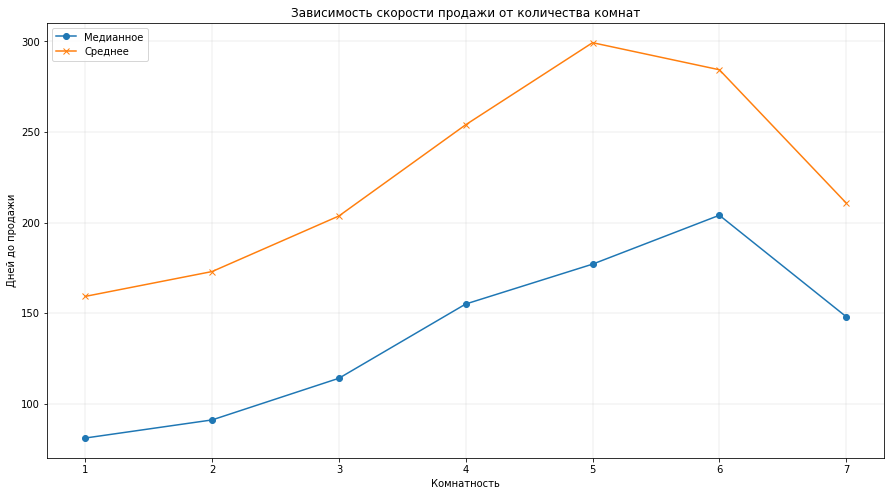

In [105]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(sale_days_per_rooms['rooms'], sale_days_per_rooms['median'], marker ='o')
ax.plot(sale_days_per_rooms['rooms'], sale_days_per_rooms['mean'], marker ='x')



plt.xlabel('Комнатность')
plt.ylabel('Дней до продажи')

#plt.ylim(0, 100000)

plt.xticks(sale_days_per_rooms.rooms)

plt.grid(linestyle='-', linewidth=0.2)

plt.legend(['Медианное', 'Среднее'], loc='upper left')

plt.title('Зависимость скорости продажи от количества комнат')

plt.show()
    

Маленькие квартиры, хоть и дороже всех по цене квадратного метра, все равно продаются быстрее всех. С увеличеннием числа комнат срок продажи увеличивается (до 6 комнат включительно).

In [106]:
price_per_floor_status = (
    data.query('rooms <= 7')
    .pivot_table(index='floor_status', values=['last_price', 'price_per_1m'], aggfunc=['median', 'mean']).reset_index()
    
)

price_per_floor_status

floor_status     median                      mean             
               last_price price_per_1m   last_price price_per_1m
0       другой     4850.0    98.195415  6580.267727   103.140083
1       первый     3900.0    81.140350  4710.337184    81.687687
2    последний     4300.0    87.387390  6291.753738    91.163016

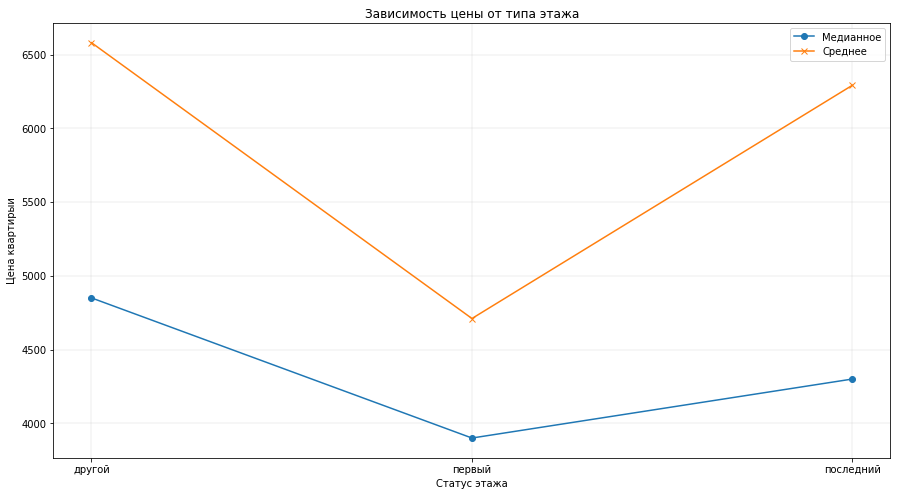

In [107]:
fig, ax = plt.subplots(figsize=(15, 8))


ax.plot(price_per_floor_status['floor_status'], price_per_floor_status['median']['last_price'], marker ='o')
ax.plot(price_per_floor_status['floor_status'], price_per_floor_status['mean']['last_price'], marker ='x')



plt.xlabel('Статус этажа')
plt.ylabel('Цена квартирыи')

#plt.ylim(0, 100000)

plt.xticks(price_per_floor_status.floor_status)

plt.grid(linestyle='-', linewidth=0.2)

plt.legend(['Медианное', 'Среднее'], loc='upper right')

plt.title('Зависимость цены от типа этажа')

plt.show()

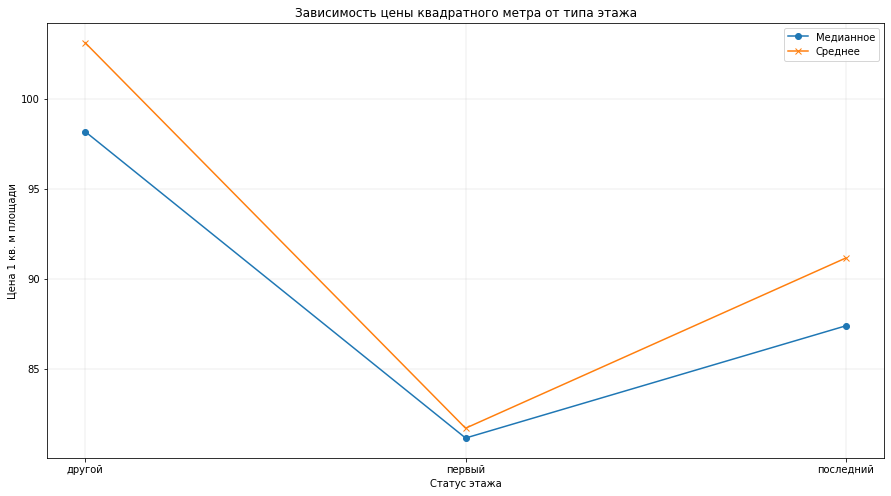

In [108]:
fig, ax = plt.subplots(figsize=(15, 8))


ax.plot(price_per_floor_status['floor_status'], price_per_floor_status['median']['price_per_1m'], marker ='o')
ax.plot(price_per_floor_status['floor_status'], price_per_floor_status['mean']['price_per_1m'], marker ='x')



plt.xlabel('Статус этажа')
plt.ylabel('Цена 1 кв. м площади')

#plt.ylim(0, 100000)

plt.xticks(price_per_floor_status.floor_status)

plt.grid(linestyle='-', linewidth=0.2)

plt.legend(['Медианное', 'Среднее'], loc='upper right')

plt.title('Зависимость цены квадратного метра от типа этажа')

plt.show()

Первые этажи дешевле последних и заметно дешевле остальных

Еще раз взглянем на данные и уберем выбросы

In [109]:
data.describe(percentiles=[.05, 1/4, 1/2, 3/4, .95, .99])

,last_price,price_per_1m,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,total_images,days_exposition,year_exposition,city_center_range_km,airport_range_km,park_range_km,pond_range_km
count,23324.000000,23324.000000,23324.000000,21897.000000,21897.000000,23324.000000,23324.000000,23324.000000,23324.000000,23243.000000,23324.000000,20186.000000,23324.000000,17906.000000,17886.000000,7964.000000,8941.000000
mean,6308.731659,98.806472,59.650930,34.504159,25.163269,2.697603,2.075373,0.589093,5.871291,10.633825,9.880466,181.041712,2017.370906,14.235452,28.836398,0.490774,0.519246
std,7695.148118,46.693375,31.110097,20.495257,13.958742,0.274626,1.017311,0.959406,4.867606,6.570124,5.678984,219.471917,1.038518,8.626940,12.651546,0.342626,0.277806
min,430.000000,7.962960,12.000000,2.000000,0.820000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2014.000000,0.000000,0.000000,0.001000,0.013000
5%,1870.000000,41.122532,31.000000,15.260000,12.500000,2.500000,1.000000,0.000000,1.000000,4.000000,1.000000,9.000000,2015.000000,4.000000,11.597000,0.095000,0.092000
25%,3450.000000,76.470590,40.000000,18.900000,17.000000,2.600000,1.000000,0.000000,2.000000,5.000000,6.000000,45.000000,2017.000000,9.000000,18.573000,0.288000,0.295000
50%,4650.000000,94.827590,52.000000,30.100000,22.000000,2.650000,2.000000,0.000000,4.000000,9.000000,9.000000,96.000000,2017.000000,13.000000,26.782500,0.454000,0.503000
75%,6750.000000,113.947558,69.325000,42.800000,29.000000,2.700000,3.000000,1.000000,8.000000,16.000000,14.000000,232.000000,2018.000000,16.000000,37.350250,0.612000,0.731000
95%,14950.000000,159.938212,114.000000,69.160000,48.900000,3.100000,4.000000,2.000000,16.000000,25.000000,20.000000,647.000000,2019.000000,32.000000,51.340000,0.967850,0.978000
99%,33000.000000,255.546829,180.600000,112.000800,78.712000,3.560000,5.000000,5.000000,23.000000,26.000000,20.000000,1069.000000,2019.000000,50.000000,58.576700,2.102000,1.159000


Уберем: с ценой 1 кв. м > 300, больше 250 кв. м, 8- и более комнатные, выше 26 этажей

In [110]:
#data = data.query('price_per_1m <=300 & total_area <= 250 & rooms <= 8 & floors_total <=26')

### Средняя цена 1 кв. м в 10 населенных пунктах


In [111]:
top10_cities = data.groupby('locality_short_name')['last_price', 'price_per_1m'].agg({'last_price' : 'count', 'price_per_1m' : 'mean'}).sort_values(by='last_price', ascending=False).head(10)

top10_cities

C:\Users\apple\AppData\Local\Temp\ipykernel_21992\894035929.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top10_cities = data.groupby('locality_short_name')['last_price', 'price_per_1m'].agg({'last_price' : 'count', 'price_per_1m' : 'mean'}).sort_values(by='last_price', ascending=False).head(10)


,last_price,price_per_1m
locality_short_name,,
Санкт-Петербург,15503,114.045494
Мурино,560,85.418225
Кудрово,448,95.125043
Шушары,435,78.469718
Всеволожск,391,68.656434
Пушкин,366,103.189157
Колпино,337,75.333296
Парголово,322,90.259622
Гатчина,307,68.746147


In [112]:
top10_cities.sort_values(by='price_per_1m')

,last_price,price_per_1m
locality_short_name,,
Выборг,237,58.141909
Всеволожск,391,68.656434
Гатчина,307,68.746147
Колпино,337,75.333296
Шушары,435,78.469718
Мурино,560,85.418225
Парголово,322,90.259622
Кудрово,448,95.125043
Пушкин,366,103.189157


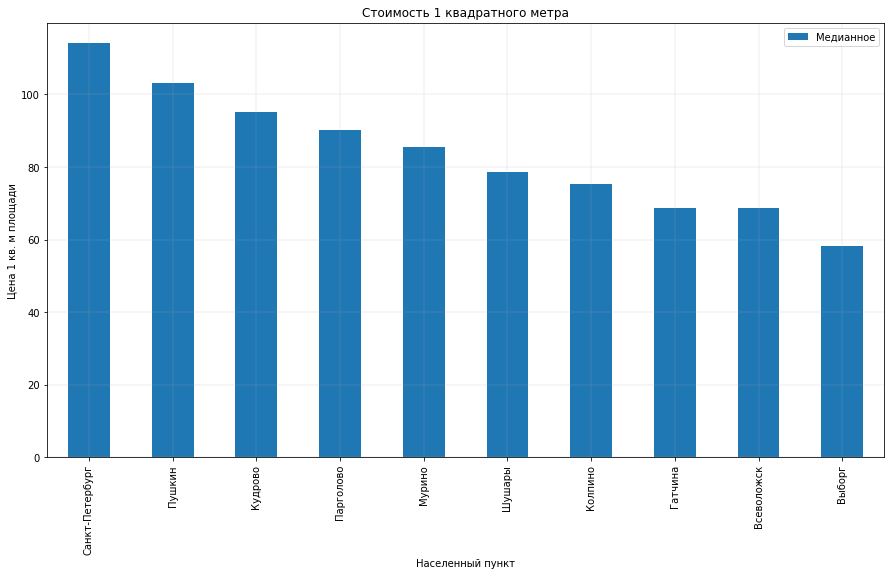

In [113]:
top10_cities.reset_index().sort_values(by='price_per_1m', ascending=False).plot(kind='bar',figsize=(15, 8), x='locality_short_name', y='price_per_1m')

plt.xlabel('Населенный пункт')
plt.ylabel('Цена 1 кв. м площади')

#plt.ylim(0, 100000)

plt.grid(linestyle='-', linewidth=0.2)

plt.legend(['Медианное', 'Среднее'], loc='upper right')

plt.title('Стоимость 1 квадратного метра')

plt.show()

Наибольшее число квартир, что очевидно, продается в Санкт-Петербурге. Цена соответственно, тоже высокая.

Самая дешевая недвижимость из топ-10 - в городах Ленинградской области. Выделяется г. Пушкин, видимо, из-за клуьтурно-исторического фактора. 

### Средняя цена километра

In [114]:
data['city_center_range_km'] = data.query('locality_short_name == "Санкт-Петербург"')['city_center_range_km'].round(decimals=0)

price_1m_per_km = data.query('locality_short_name == "Санкт-Петербург"').pivot_table(index='city_center_range_km', values='price_per_1m').reset_index()

price_1m_per_km['city_center_range_km'] = price_1m_per_km['city_center_range_km'].astype(int)

price_1m_per_km.head(10)

,city_center_range_km,price_per_1m
0,0,245.833530
1,1,169.450787
2,2,154.796224
3,3,121.134815
4,4,130.289578
5,5,138.371071
6,6,148.024857
7,7,154.447416
8,8,124.995012
9,9,113.176630


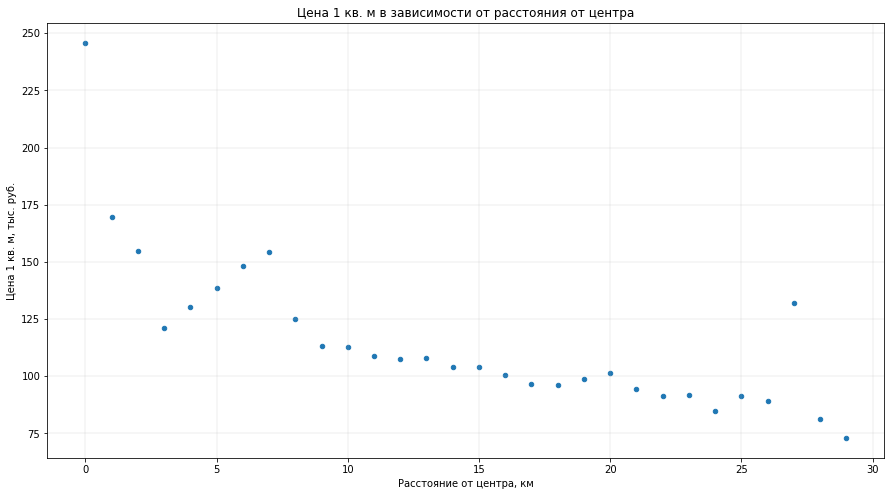

In [115]:
price_1m_per_km.plot.scatter(x='city_center_range_km', y='price_per_1m', figsize=(15, 8))

plt.title('Цена 1 кв. м в зависимости от расстояния от центра')

plt.xlabel('Расстояние от центра, км')
plt.ylabel('Цена 1 кв. м, тыс. руб.')

plt.grid(linestyle='-', linewidth=0.2)

plt.show()



В целом, с расстоянием от центра цена снижается. Взлет цены на расстояниях 5-7,5 км, вероятно, вызван побережьем Невы

## Влияние факторов на цену квартиры

<AxesSubplot:>

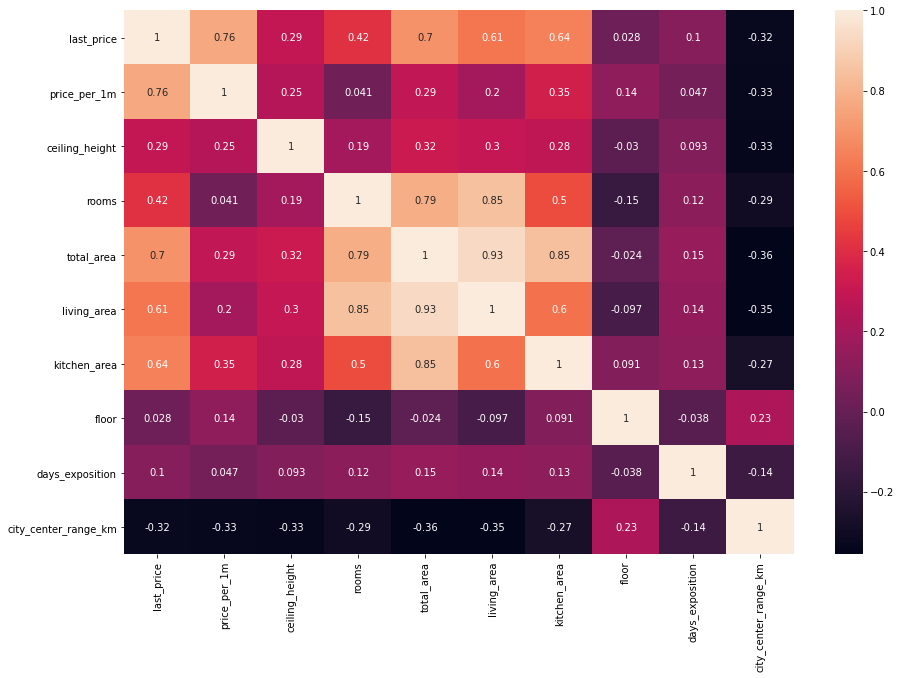

In [116]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[['last_price', 'price_per_1m', 'ceiling_height', 'rooms',
       'total_area', 'living_area', 'kitchen_area', 
       'floor', 'days_exposition',
       'city_center_range_km']].corr(), annot=True)

Корреляция высока между ценой и площадями (общей, жилой и кухни), такж зависят друг от друга цена и цена 1 кв. м.

Отрицательная корреляция между расстоянием от центра и ценой, что логично.

## Общий вывод

Проведено исследование объявлений о продаже недвижимости в Санкт-Петербурге.

В ходе исследования была проведена проверка данных (устранены пропуски, неверные значения, исключены выбивающиеся и малопредставленные значения).

Числовые данные приведены к целочисленному виду там, где это необходимо (количество комнат, балконов и т. п.).

Обработаны названия населенных пунктов, категоризированы по принадлежности (Санкт-Петербург, область).

Пропуски в высоте потолков заполнены медианным значением, устранены ошибочно введенные данные.

Рассчитаны площади: жилая, кухни и общая; добавлена стоимость 1 кв. м площади. Заведена категория этажа, первый, последний, другой.

В результате работы с данными объем датасета уменьшился всего на 1,5 %.


Построены графики распределения основных параметров недвижимости (площади, комнатность, высота потолков, расстояние от центра города, сроки продажи).

Проанализировано влияние представленных в исходных данных факторов на цену недвижимости и скорость ее продажи.

Определены города с самой высокой и самой низкой стоимостью квадратного метра.


Выявлено, что:
- самые популярные квартиры - это студии и однокомнатные;
- цена квадратного метра падает с количеством комнат;
- быстрее всего продаются малокомнатные квартиры, с ростом числа комнат длительность продажи растет;
- на цену влияет площадь, количество комнат и расстояние до центра;
- средний срок продажи квартиры - полгода.

Рекомендации при сборе данных:

- проверять заполнение всех полей;
- проверять значение обще площади по отношению к сумме жилой площади и площади кухни;
- проверять все числовые данные на корректность (например, высота потолков);
- проверять характеристики дома по адресу (например, этажность, расстояние до центра, аэропорта, парка и водоема).
